<a href="https://colab.research.google.com/github/DrMalvavisco/final_project-ds_santander-f3-team6-machine_learning_in_Python/blob/main/Entrega_Final_Procesamiento_DanielTapia_LuisZanabria_NorbertoPena_HaroldVasquez/Proyecto_equipo6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a id="problema"></a>
# <font color=green>Identificaci√≥n del Problema</font>

Para cualquier nuevo emprendedor, existe una serie de retos que lo abruman en su aventura de iniciar un nuevo negocio. La mayor incertidumbre es poder disponer de la informaci√≥n necesaria que lo apoye en la toma correcta de decisiones y as√≠ mitigar los riesgos de una mala inversi√≥n de tiempo y dinero.

Para esto, ser√≠a de gran ayuda proveerle a cada emprendedor de herramientas que le aporten informaci√≥n ordenada, certera y fidedigna; de tal forma que le otorgue seguridad y mayor certeza de si su idea ser√° rentable o no.

Por lo tanto, sin lugar a duda, la **ciencia de datos** es la mejor herramienta que permitir√≠a la creaci√≥n de este tipo de herramientas de apoyo para un emprendedor y su nuevo negocio.

## Investigaci√≥n al respecto del problema

En esta secci√≥n ira la investigaci√≥n

## B√∫squeda de soluciones anteriores

En esta secci√≥n ir√° las soluciones previas

<a id="preguntas"></a>
# <font color=green>Planteamiento de Preguntas </font>

De acuerdo con el problema planteado anteriormente, surgieron las siguientes preguntas tanto del emprendedor como del equipo:

1.  ¬øCu√°l es la mejor ubicaci√≥n en Guadalajara, M√©xico para abrir mi negocio de bicicletas?
2. ¬øQu√© tantas ventas podr√© obtener en los primeros meses de iniciado mi negocio?
3. ¬øCu√°les son los productos m√°s demandados por los potenciales clientes?
4. ¬øQu√© precios ser√°n los m√°s competitivos para las bicicletas?
5. ¬øQu√© tan frecuente un cliente querr√° comprar ropa o accesorios para sus bicicletas?
6. ¬øQu√© tantos clientes acudir√°n a mi negocio por una reparaci√≥n o mejora en su bicicleta?

Aunque no tenemos seguridad si podremos responder todas las preguntas planteadas, se le coment√≥ al emprendedor que se har√° un an√°lisis de la data disponible y se evaluar√° que informaci√≥n se le puede presentar.



# Colecci√≥n de Datos
Se tomo la decision de usar "Bike Buyers 1000" y "Bike Sales", dado que contienen informacion relevante a la problematica sobre la cual se esta tratando y ambos datasets se complementan, los cuales fueron encontrados en kaggle.

"Bike Buyers 1000" 
link: "https://www.kaggle.com/datasets/heeraldedhia/bike-buyers"

"Bike Sales"
link: "https://www.kaggle.com/datasets/liyingiris90/bike-sales"

## Proceso para obtener el dataset

Dado que los archivos contenidos dentro del conjunto de datos de Bike Sales estan en formato .xlsx, se uso la funcion <font color =red> *pd.read_excel* </font> de pandas.

Para Bike Buyers al ser un formato csv, se usa nuestra funcion ya conocida  <font color =red> *pd.read_csv*</font>  

Se importan las siguientes librerias...

In [ ]:
!pip install colorama

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from colorama import Fore
from colorama import Style
import matplotlib.pyplot as plt
sns.set()
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.cluster import KMeans

Se guardan los respectivos DataFrames del conjunto de datos <font color=blue> "bike sales"</font> y <font color=blue> "bike buyers"

In [ ]:
compradores = pd.read_csv("https://raw.githubusercontent.com/hvasquez28/g1-ds_santander-f2-team7-Phyton/datos-faltantes-y-correciones/Entrega_Final_Procesamiento_DanielTapia_LuisZanabria_NorbertoPena_HaroldVasquez/datasets/bike_buyers.csv")

In [ ]:
bikes = pd.read_excel('https://github.com/hvasquez28/g1-ds_santander-f2-team7-Phyton/blob/datos-faltantes-y-correciones/Entrega_Final_Procesamiento_DanielTapia_LuisZanabria_NorbertoPena_HaroldVasquez/datasets/bikes.xlsx?raw=true')
bikestores = pd.read_excel("https://github.com/hvasquez28/g1-ds_santander-f2-team7-Phyton/blob/datos-faltantes-y-correciones/Entrega_Final_Procesamiento_DanielTapia_LuisZanabria_NorbertoPena_HaroldVasquez/datasets/bikeshops.xlsx?raw=true")
orders = pd.read_excel("https://github.com/hvasquez28/g1-ds_santander-f2-team7-Phyton/blob/datos-faltantes-y-correciones/Entrega_Final_Procesamiento_DanielTapia_LuisZanabria_NorbertoPena_HaroldVasquez/datasets/orders.xlsx?raw=true")

/usr/local/lib/python3.7/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


# Exploracion de los Datasets
Procedemos a revisar cada DataFrame usando <font color=blue> .head() </font> y <font color=blue>.tail()  </font>, asi como <font color=blue> .dtypes, .columns, .shape, .loc[$n:m$] </font> (donde $n,m ‚àà ùñ≠$ y $n<m.$) 

In [ ]:
compradores.dtypes #Se tienen flotantes que deberian de ser enteros.
compradores.shape #Se tienen 1000 entradas y 13 columnas.
compradores.columns # ID, Marital S, Gender, Income, Children, Education, Occupation, Home Owner, Cars, Commute Distance, Region, Age, purchase bike
compradores.head() # Se observan NaNs
compradores.tail() # Se observan NaNs
c=list(compradores.columns) # Se guarda el nombre de las columnas en una lista, que sera usada mas adelante para cambiar los nombres de nuestro dataframe. 
compradores.loc[500:515] # Se observan Nans. 

ID Marital Status  Gender    Income  Children        Education  \
500  15559        Married    Male   60000.0       5.0        Bachelors   
501  19235        Married  Female   50000.0       0.0  Graduate Degree   
502  15275        Married    Male   40000.0       0.0  Partial College   
503  20339        Married  Female  130000.0       1.0        Bachelors   
504  25405        Married    Male   70000.0       2.0        Bachelors   
505  15940        Married    Male  100000.0       4.0  Partial College   
506  25074        Married  Female   70000.0       4.0        Bachelors   
507  24738        Married  Female   40000.0       1.0  Partial College   
508  16337        Married    Male   60000.0       0.0  Partial College   
509  24357        Married    Male       NaN       3.0        Bachelors   
510  18613         Single    Male   70000.0       0.0        Bachelors   
511  12207         Single    Male   80000.0       4.0        Bachelors   
512  18052        Married  Female   60000.0       1.0  Partial College   
513  13353         Single  Female   60000.0       4.0  Graduate Degree   
514  19399         Single    Male   40000.0       0.0        Bachelors   
515  16154        Married  Female   70000.0       5.0        Bachelors   

         Occupation Home Owner  Cars Commute Distance         Region   Age  \
500    Professional        Yes   1.0        2-5 Miles  North America  47.0   
501  Skilled Manual        Yes   0.0        0-1 Miles  North America  34.0   
502  Skilled Manual        Yes   1.0       5-10 Miles  North America  29.0   
503      Management        Yes   4.0        2-5 Miles  North America  44.0   
504  Skilled Manual        Yes   1.0        2-5 Miles  North America  38.0   
505    Professional        Yes   4.0        0-1 Miles  North America  40.0   
506    Professional        Yes   2.0        2-5 Miles  North America  42.0   
507        Clerical        Yes   1.0        1-2 Miles  North America  51.0   
508  Skilled Manual         No   2.0        1-2 Miles  North America  29.0   
509    Professional        Yes   1.0        2-5 Miles  North America  48.0   
510    Professional         No   1.0        2-5 Miles  North America  37.0   
511      Management        Yes   NaN       5-10 Miles  North America  66.0   
512  Skilled Manual        Yes   1.0        0-1 Miles  North America  45.0   
513      Management        Yes   2.0        10+ Miles  North America  61.0   
514    Professional         No   1.0        2-5 Miles  North America  45.0   
515    Professional        Yes   2.0        2-5 Miles  North America  47.0   

    Purchased Bike  
500             No  
501             No  
502             No  
503            Yes  
504            Yes  
505             No  
506            Yes  
507            Yes  
508             No  
509            Yes  
510            Yes  
511            Yes  
512            Yes  
513            Yes  
514             No  
515             No

In [ ]:
bikes.dtypes # El unico data que parecer ser incorrecto es el precio, que es de tipo int. 
bikes.shape # Se tienen un total de 97 filas con 5 columnas
bikes.columns # bike.id, model, category1, category2, frame, price. Se renombraran columnas.
bikes.head() #No se observan Nans.
bikes.tail() #No se observan Nans.
bc=list(bikes.columns)
bikes.loc[46:58] # No se observan Nans de forma aleatoria

bike.id                  model category1           category2   frame  \
46       47        Jekyll Carbon 1  Mountain       Over Mountain  Carbon   
47       48        Jekyll Carbon 2  Mountain       Over Mountain  Carbon   
48       49        Jekyll Carbon 3  Mountain       Over Mountain  Carbon   
49       50        Jekyll Carbon 4  Mountain       Over Mountain  Carbon   
50       51       Trigger Carbon 1  Mountain       Over Mountain  Carbon   
51       52       Trigger Carbon 2  Mountain       Over Mountain  Carbon   
52       53       Trigger Carbon 3  Mountain       Over Mountain  Carbon   
53       54       Trigger Carbon 4  Mountain       Over Mountain  Carbon   
54       55  Scalpel-Si Black Inc.  Mountain  Cross Country Race  Carbon   
55       56        Scalpel-Si Race  Mountain  Cross Country Race  Carbon   
56       57    Scalpel-Si Hi-Mod 1  Mountain  Cross Country Race  Carbon   
57       58    Scalpel-Si Carbon 2  Mountain  Cross Country Race  Carbon   
58       59    Scalpel-Si Carbon 3  Mountain  Cross Country Race  Carbon   

    price  
46   7990  
47   6070  
48   3840  
49   3200  
50   8200  
51   5970  
52   3730  
53   3200  
54  12790  
55   9060  
56   7460  
57   6390  
58   5330

In [ ]:
bikestores.dtypes # Todos los datos tienen el tipo correcto.
bikestores.shape # Se tienen un total de 30 filas con 6 columnas
bikestores.columns # bikeshop.id , bikeshop.name, bikeshop.city, bikeshop.state, latitude , longitude. Se renombraran columnas.
bikestores.head() # No se observan Nans.
bikestores.tail() # No se observan Nans.
bs=list(bikestores.columns)
bikestores.loc[10:25] #No se observan Nans. 

bikeshop.id                 bikeshop.name  bikeshop.city bikeshop.state  \
10           11               New York Cycles       New York             NY   
11           12                 Dallas Cycles         Dallas             TX   
12           13  Oklahoma City Race Equipment  Oklahoma City             OK   
13           14            Albuquerque Cycles    Albuquerque             NM   
14           15               Austin Cruisers         Austin             TX   
15           16               Phoenix Bi-peds        Phoenix             AZ   
16           17              Las Vegas Cycles      Las Vegas             NV   
17           18            Los Angeles Cycles    Los Angeles             CA   
18           19        San Francisco Cruisers  San Francisco             CA   
19           20              Portland Bi-peds       Portland             OR   
20           21        Seattle Race Equipment        Seattle             WA   
21           22               Ann Arbor Speed      Ann Arbor             MI   
22           23        Philadelphia Bike Shop   Philadelphia             PA   
23           24            Providence Bi-peds     Providence             RI   
24           25       New Orleans Velocipedes    New Orleans             LA   
25           26          Miami Race Equipment          Miami             FL   

     latitude   longitude  
10  40.712784  -74.005941  
11  32.776664  -96.796988  
12  35.467560  -97.516428  
13  35.085334 -106.605553  
14  30.267153  -97.743061  
15  33.448377 -112.074037  
16  36.169941 -115.139830  
17  34.052234 -118.243685  
18  37.774929 -122.419416  
19  45.523062 -122.676482  
20  47.606209 -122.332071  
21  42.280826  -83.743038  
22  39.952584  -75.165222  
23  41.823989  -71.412834  
24  29.951066  -90.071532  
25  25.761680  -80.191790

In [ ]:
orders.dtypes # Se observa que order.id, order.line, customer.id y product.id son de tipo flotante cuando deberian de ser de tipo entero.
orders.shape # Tiene un total de 15644 filas y 7 columnas. 
orders.columns #'Unnamed: 0', 'order.id', 'order.line', 'order.date', 'customer.id','product.id' y 'quantity'. Se renombraran las columnas.
oc=list(orders.columns) 
orders.head() #No se observan Nans, por otro lado, se observa que la columna 'Unnamed: 0' esta repetida. 
orders.tail() # No se observan Nans. 
orders.loc[10468:10480] # no se observan Nans.

Unnamed: 0  order.id  order.line order.date  customer.id  product.id  \
10468       10469    1339.0         1.0 2014-07-08         25.0        12.0   
10469       10470    1339.0         2.0 2014-07-08         25.0        61.0   
10470       10471    1339.0         3.0 2014-07-08         25.0        72.0   
10471       10472    1339.0         4.0 2014-07-08         25.0        17.0   
10472       10473    1339.0         5.0 2014-07-08         25.0        42.0   
10473       10474    1339.0         6.0 2014-07-08         25.0        91.0   
10474       10475    1339.0         7.0 2014-07-08         25.0        50.0   
10475       10476    1339.0         8.0 2014-07-08         25.0        28.0   
10476       10477    1339.0         9.0 2014-07-08         25.0        39.0   
10477       10478    1339.0        10.0 2014-07-08         25.0        87.0   
10478       10479    1339.0        11.0 2014-07-08         25.0        88.0   
10479       10480    1339.0        12.0 2014-07-08         25.0        77.0   
10480       10481    1339.0        13.0 2014-07-08         25.0        23.0   

       quantity  
10468       1.0  
10469       1.0  
10470       1.0  
10471       1.0  
10472       2.0  
10473       1.0  
10474       1.0  
10475       1.0  
10476       1.0  
10477       8.0  
10478       1.0  
10479       1.0  
10480       1.0

Conociendo los valores de algunas columnas de algunos dataSets

In [ ]:
orders['product.id'].unique()

array([48., 52., 76.,  2., 50.,  1.,  4., 34., 26., 96., 66., 35., 72.,
       45., 39., 87., 31., 15., 10., 65., 55.,  7., 67., 61., 18., 42.,
       56., 93., 29., 13., 16., 36., 19., 11., 23., 43., 27., 49., 28.,
       32., 22., 63., 40., 37.,  8., 57., 69.,  3.,  5., 84., 90., 88.,
       44., 73., 91., 95., 94., 38., 21., 64.,  9., 14., 85., 79., 78.,
       77., 51., 33., 74., 24., 71., 92., 30.,  6., 97., 12., 20., 70.,
       89., 80., 47., 58., 25., 75., 62., 60., 54., 82., 53., 46., 41.,
       83., 86., 81., 68., 17., 59.])

In [ ]:
orders['customer.id'].unique()

array([ 2., 10.,  6., 22.,  8., 16.,  9., 25., 20., 19.,  7., 14., 13.,
        5., 17., 21.,  3., 30., 24., 11., 15., 28.,  1., 27., 29., 18.,
       26.,  4., 23., 12.])

In [ ]:
bikes['bike.id'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97])

In [ ]:
bikestores['bikeshop.id'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])

#Renombramos las columnas en los DataFrames.

Se crean diccionarios para cambiar el nombre de las columnas de nuestros data frames.

In [ ]:
comp_names = {c[0]:'id_comprador',
              c[1]:'estado_civil',
              c[2]:'genero',
              c[3]:'sueldo',
              c[4]:'hijos',
              c[5]:'educacion',
              c[6]:"profesion",
              c[7]:"posee_casa",
              c[8]:'autos',
              c[9]:'distancia_d_viaje',
              c[10]:'region',
              c[11]:'edad',
              c[12]:'bicicleta_adquirida'}

bike_names = {bc[0]:'id_bicicleta',
              bc[1]:'modelo',
              bc[2]:'categoria_1',
              bc[3]:'categoria_2',
              bc[4]:'aleacion',
              bc[5]:'precio'}

stores_nombres = {bs[0]:'id_tienda',
                  bs[1]:'nombre_tienda',
                  bs[2]:'ciudad',
                  bs[3]:'estado',
                  bs[4]:'latitud',
                  bs[5]:'longitud'}

orders_nombres = {oc[1]:'id_orden',
                  oc[2]:'orden_line',
                  oc[3]:'orden_date',
                  oc[4]:'id_tienda',
                  oc[5]:'id_bicicleta',
                  oc[6]:'numero_items'}

Nos percatamos del hecho, de que la columna customer_id es realmente el id_tienda. Dado que ambas coinciden con el numero de entradas y los valores asociados a cada una. 

In [ ]:
compradores = compradores.rename(columns=comp_names)
ordenes = orders.rename(columns=orders_nombres)
bicicletas = bikes.rename(columns=bike_names)
tiendas =  bikestores.rename(columns=stores_nombres)

# Eliminaci√≥n de NaNs

EPara tener unos DataFrames mas limpios, se eliminan los NaNs

In [ ]:
# Se crean las siguientes funciones para determinar NaNs entre los distintos DataFrames.
def numero_nans(dataframe):
    print(dataframe.isna().sum())

def porcentaje_nans(dataframe):
  print(dataframe.isna().sum()/len(dataframe)*100)

In [ ]:
porcentaje_nans(ordenes)
porcentaje_nans(tiendas)
porcentaje_nans(bicicletas)
porcentaje_nans(compradores) #El unico DataFrame con Nans presentes, es el de Compradores. 
numero_nans(compradores)

Unnamed: 0      0.0
id_orden        0.0
orden_line      0.0
orden_date      0.0
id_tienda       0.0
id_bicicleta    0.0
numero_items    0.0
dtype: float64
id_tienda        0.0
nombre_tienda    0.0
ciudad           0.0
estado           0.0
latitud          0.0
longitud         0.0
dtype: float64
id_bicicleta    0.0
modelo          0.0
categoria_1     0.0
categoria_2     0.0
aleacion        0.0
precio          0.0
dtype: float64
id_comprador           0.0
estado_civil           0.7
genero                 1.1
sueldo                 0.6
hijos                  0.8
educacion              0.0
profesion              0.0
posee_casa             0.4
autos                  0.9
distancia_d_viaje      0.0
region                 0.0
edad                   0.8
bicicleta_adquirida    0.0
dtype: float64
id_comprador            0
estado_civil            7
genero                 11
sueldo                  6
hijos                   8
educacion               0
profesion               0
posee_casa           

Se llanan las Nans. 

In [ ]:
compradores[['hijos','autos']] = compradores[['hijos','autos']].fillna(0)
compradores['estado_civil'] = compradores['estado_civil'].fillna('Single')
compradores['posee_casa'] = compradores['posee_casa'].fillna('No')
compradores =compradores.dropna(how='any')
compradores = compradores.reset_index(drop=True) 
numero_nans(compradores)

id_comprador           0
estado_civil           0
genero                 0
sueldo                 0
hijos                  0
educacion              0
profesion              0
posee_casa             0
autos                  0
distancia_d_viaje      0
region                 0
edad                   0
bicicleta_adquirida    0
dtype: int64


#Se procede a cambiar el tipo de dato de cada DataFrame.

Para esto crearemos diccionarios con los nuevos tipos de datos y aplicaremos la funcion de pandas *.astype()*

In [ ]:
print(ordenes.dtypes) # Tiene flotantes que deben de ser enteros. 
print(tiendas.dtypes) # Tiendas tiene todos los tipos de datos correctos.
print(compradores.dtypes) # Tiene flotantes que deben de ser enteros. 
print(bicicletas.dtypes) # Tiene un int que deberia de ser flotante. 

Unnamed: 0               int64
id_orden               float64
orden_line             float64
orden_date      datetime64[ns]
id_tienda              float64
id_bicicleta           float64
numero_items           float64
dtype: object
id_tienda          int64
nombre_tienda     object
ciudad            object
estado            object
latitud          float64
longitud         float64
dtype: object
id_comprador             int64
estado_civil            object
genero                  object
sueldo                 float64
hijos                  float64
educacion               object
profesion               object
posee_casa              object
autos                  float64
distancia_d_viaje       object
region                  object
edad                   float64
bicicleta_adquirida     object
dtype: object
id_bicicleta     int64
modelo          object
categoria_1     object
categoria_2     object
aleacion        object
precio           int64
dtype: object


In [ ]:
c=list(compradores.columns)
oc=list(ordenes.columns)
nuevos_types_compra = {c[4]:int,
         c[8]:int,
         c[11]:int}

new_types_orders ={oc[1]:int,
                   oc[2]:int,
                   oc[4]:int,
                   oc[5]:int,
                   oc[6]:int}

In [ ]:
ordenes = ordenes.astype(new_types_orders)
compradores = compradores.astype(nuevos_types_compra)
bicicletas['precio'] = bicicletas['precio'].astype(float) # Se usa este metodo, dado que solo hay que cambiar de tipo de dato a una variable.

##Procederemos a eliminar la columna 'Unnamed: 0' del DataFrame ordenes

In [ ]:
ordenes.drop(columns='Unnamed: 0',inplace=True)

#Procedemos a unir las diferentes tablas para posteriormente realizar las agregaciones adecuadas. 

###Ordenes y Bicicletas.

In [ ]:
or_bikes = pd.merge(ordenes,bicicletas,left_on='id_bicicleta',right_index=True)
or_bikes.drop(columns=['id_bicicleta_x','id_bicicleta_y'], inplace=True)
or_bikes

id_bicicleta  id_orden  orden_line orden_date  id_tienda  numero_items  \
0                48         1           1 2011-01-07          2             1   
120              48        23           1 2011-02-04          8             1   
344              48        44          13 2011-02-28         16             1   
374              48        48           5 2011-03-03         30             1   
464              48        66           2 2011-03-23          6             1   
...             ...       ...         ...        ...        ...           ...   
14839            59      1894           4 2015-09-08          4             1   
14927            59      1915           1 2015-09-25         10             1   
15180            59      1938           9 2015-10-29         10             1   
15569            59      1986          27 2015-12-17         28             1   
15613            59      1995          13 2015-12-23         10             1   

                    modelo categoria_1         categoria_2 aleacion  precio  
0          Jekyll Carbon 3    Mountain       Over Mountain   Carbon  3840.0  
120        Jekyll Carbon 3    Mountain       Over Mountain   Carbon  3840.0  
344        Jekyll Carbon 3    Mountain       Over Mountain   Carbon  3840.0  
374        Jekyll Carbon 3    Mountain       Over Mountain   Carbon  3840.0  
464        Jekyll Carbon 3    Mountain       Over Mountain   Carbon  3840.0  
...                    ...         ...                 ...      ...     ...  
14839  Scalpel-Si Carbon 4    Mountain  Cross Country Race   Carbon  4260.0  
14927  Scalpel-Si Carbon 4    Mountain  Cross Country Race   Carbon  4260.0  
15180  Scalpel-Si Carbon 4    Mountain  Cross Country Race   Carbon  4260.0  
15569  Scalpel-Si Carbon 4    Mountain  Cross Country Race   Carbon  4260.0  
15613  Scalpel-Si Carbon 4    Mountain  Cross Country Race   Carbon  4260.0  

[15452 rows x 11 columns]

###Tiendas y Ordenes

In [ ]:
str_orders = pd.merge(ordenes,tiendas,left_on='id_tienda',right_index=True)
str_orders.drop(columns=['id_tienda_x','id_tienda_y'])

id_tienda  id_orden  orden_line orden_date  id_bicicleta  numero_items  \
0              2         1           1 2011-01-07            48             1   
1              2         1           2 2011-01-07            52             1   
94             2        19           1 2011-01-28            66             2   
95             2        19           2 2011-01-28            61             1   
152            2        28           1 2011-02-10            47             1   
...          ...       ...         ...        ...           ...           ...   
14693         12      1870           1 2015-08-24            95             1   
14719         12      1879           1 2015-08-26            93             3   
14814         12      1891           1 2015-09-07            31             1   
14815         12      1891           2 2015-09-07            30             1   
15589         12      1993           1 2015-12-22            37             1   

                      nombre_tienda         ciudad estado    latitud  \
0           Columbus Race Equipment       Columbus     OH  39.961176   
1           Columbus Race Equipment       Columbus     OH  39.961176   
94          Columbus Race Equipment       Columbus     OH  39.961176   
95          Columbus Race Equipment       Columbus     OH  39.961176   
152         Columbus Race Equipment       Columbus     OH  39.961176   
...                             ...            ...    ...        ...   
14693  Oklahoma City Race Equipment  Oklahoma City     OK  35.467560   
14719  Oklahoma City Race Equipment  Oklahoma City     OK  35.467560   
14814  Oklahoma City Race Equipment  Oklahoma City     OK  35.467560   
14815  Oklahoma City Race Equipment  Oklahoma City     OK  35.467560   
15589  Oklahoma City Race Equipment  Oklahoma City     OK  35.467560   

        longitud  
0     -82.998794  
1     -82.998794  
94    -82.998794  
95    -82.998794  
152   -82.998794  
...          ...  
14693 -97.516428  
14719 -97.516428  
14814 -97.516428  
14815 -97.516428  
15589 -97.516428  

[15492 rows x 11 columns]

##Tiendas, Bicicletas y Ordenes

Para obtener las verdaderas ganancias por cada bicicleta se crea una nueva columna llamada total. 

In [ ]:
total_vendido = or_bikes['numero_items']*or_bikes['precio']
or_bikes['total'] = total_vendido
or_bikes

id_bicicleta  id_orden  orden_line orden_date  id_tienda  numero_items  \
0                48         1           1 2011-01-07          2             1   
120              48        23           1 2011-02-04          8             1   
344              48        44          13 2011-02-28         16             1   
374              48        48           5 2011-03-03         30             1   
464              48        66           2 2011-03-23          6             1   
...             ...       ...         ...        ...        ...           ...   
14839            59      1894           4 2015-09-08          4             1   
14927            59      1915           1 2015-09-25         10             1   
15180            59      1938           9 2015-10-29         10             1   
15569            59      1986          27 2015-12-17         28             1   
15613            59      1995          13 2015-12-23         10             1   

                    modelo categoria_1         categoria_2 aleacion  precio  \
0          Jekyll Carbon 3    Mountain       Over Mountain   Carbon  3840.0   
120        Jekyll Carbon 3    Mountain       Over Mountain   Carbon  3840.0   
344        Jekyll Carbon 3    Mountain       Over Mountain   Carbon  3840.0   
374        Jekyll Carbon 3    Mountain       Over Mountain   Carbon  3840.0   
464        Jekyll Carbon 3    Mountain       Over Mountain   Carbon  3840.0   
...                    ...         ...                 ...      ...     ...   
14839  Scalpel-Si Carbon 4    Mountain  Cross Country Race   Carbon  4260.0   
14927  Scalpel-Si Carbon 4    Mountain  Cross Country Race   Carbon  4260.0   
15180  Scalpel-Si Carbon 4    Mountain  Cross Country Race   Carbon  4260.0   
15569  Scalpel-Si Carbon 4    Mountain  Cross Country Race   Carbon  4260.0   
15613  Scalpel-Si Carbon 4    Mountain  Cross Country Race   Carbon  4260.0   

        total  
0      3840.0  
120    3840.0  
344    3840.0  
374    3840.0  
464    3840.0  
...       ...  
14839  4260.0  
14927  4260.0  
15180  4260.0  
15569  4260.0  
15613  4260.0  

[15452 rows x 12 columns]

In [ ]:
str_or_bks = pd.merge(or_bikes,tiendas,left_on='id_tienda',right_index=True)
str_or_bks.drop(columns=['id_tienda_x','id_tienda_y'],inplace=True)
str_or_bks


id_tienda  id_bicicleta  id_orden  orden_line orden_date  numero_items  \
0              2            48         1           1 2011-01-07             1   
1001           2            48       132           6 2011-05-13             1   
3830           2            48       507           2 2012-06-26             1   
3990           2            48       528          18 2012-07-16             1   
5358           2            48       691          13 2013-02-05             1   
...          ...           ...       ...         ...        ...           ...   
4354          15            86       564          10 2012-08-15             1   
4348          15            17       564           4 2012-08-15             2   
7698          15            17       976          13 2013-08-14             1   
13955         15            17      1756           3 2015-06-08             1   
15641         15            17      2000           6 2015-12-25             1   

                modelo categoria_1    categoria_2  aleacion  precio   total  \
0      Jekyll Carbon 3    Mountain  Over Mountain    Carbon  3840.0  3840.0   
1001   Jekyll Carbon 3    Mountain  Over Mountain    Carbon  3840.0  3840.0   
3830   Jekyll Carbon 3    Mountain  Over Mountain    Carbon  3840.0  3840.0   
3990   Jekyll Carbon 3    Mountain  Over Mountain    Carbon  3840.0  3840.0   
5358   Jekyll Carbon 3    Mountain  Over Mountain    Carbon  3840.0  3840.0   
...                ...         ...            ...       ...     ...     ...   
4354           Habit 5    Mountain          Trail  Aluminum  2340.0  2340.0   
4348         CAAD8 105        Road     Elite Road  Aluminum  1410.0  2820.0   
7698         CAAD8 105        Road     Elite Road  Aluminum  1410.0  1410.0   
13955        CAAD8 105        Road     Elite Road  Aluminum  1410.0  1410.0   
15641        CAAD8 105        Road     Elite Road  Aluminum  1410.0  1410.0   

                 nombre_tienda    ciudad estado    latitud    longitud  
0      Columbus Race Equipment  Columbus     OH  39.961176  -82.998794  
1001   Columbus Race Equipment  Columbus     OH  39.961176  -82.998794  
3830   Columbus Race Equipment  Columbus     OH  39.961176  -82.998794  
3990   Columbus Race Equipment  Columbus     OH  39.961176  -82.998794  
5358   Columbus Race Equipment  Columbus     OH  39.961176  -82.998794  
...                        ...       ...    ...        ...         ...  
4354           Phoenix Bi-peds   Phoenix     AZ  33.448377 -112.074037  
4348           Phoenix Bi-peds   Phoenix     AZ  33.448377 -112.074037  
7698           Phoenix Bi-peds   Phoenix     AZ  33.448377 -112.074037  
13955          Phoenix Bi-peds   Phoenix     AZ  33.448377 -112.074037  
15641          Phoenix Bi-peds   Phoenix     AZ  33.448377 -112.074037  

[15304 rows x 17 columns]

#Agregaciones

##Numero de items vendidos por cada tienda

In [ ]:
str_orders.groupby(['nombre_tienda'])['numero_items'].sum().sort_values(ascending=False).head(5) ## SE USA HEAD  para no Mostrar tantos resultados

nombre_tienda
New York Cycles            3471
Minneapolis Bike Shop      2301
Las Vegas Cycles           1419
Columbus Race Equipment    1264
Albuquerque Cycles         1155
Name: numero_items, dtype: int64

Las tiendas que mas han vendido con su respectivo total son...
>New York Cycles          ~       3471

>Minneapolis Bike Shop      ~     2301

>Las Vegas Cycles            ~    1419

>Columbus Race Equipment      ~   1264

>Albuquerque Cycles            ~  1155

Mientras que las de menores vendas se conforman por... con un total de..
>Phoenix Bi-peds        ~          246

>Providence Bi-peds      ~       245

>Oklahoma City Race Equipment  ~   234

>Wichita Speed                  ~ 186

>Ann Arbor Speed                ~  128

## Bicicletas Menos y Mas vendidas

In [ ]:
or_bikes.groupby('modelo')['numero_items'].sum().sort_values(ascending=False)

modelo
Slice Ultegra                      301
F-Si 3                             293
F-Si Black Inc.                    293
Supersix Evo Ultegra 4             290
CAAD Disc Ultegra                  282
                                  ... 
Habit 4                            143
Habit Carbon 2                     143
Habit Carbon SE                    140
Synapse Carbon Disc Ultegra D12    139
Jekyll Carbon 4                    132
Name: numero_items, Length: 96, dtype: int64

Las Bicicletas mas vendidas fueron... con un total de...
>Slice Ultegra        ->              301

>F-Si 3                ->             293

>F-Si Black Inc.         ->           293

>Supersix Evo Ultegra 4    ->         290

>CAAD Disc Ultegra           ->       282


Mientras que las menos vendidas fueron... con un total de...
>Habit 4              ~              143

>Habit Carbon 2        ~             143

>Habit Carbon SE        ~            140

>Synapse Carbon Disc Ultegra D12  ~  139

>Jekyll Carbon 4                ~    132

##Ganancias Obtenidas por cada Bicicleta

In [ ]:
or_bikes.groupby('modelo')['total'].sum().sort_values(ascending=False)

modelo
Scalpel-Si Black Inc.             3299820.0
F-Si Black Inc.                   3278670.0
Habit Hi-Mod Black Inc.           2670500.0
Trigger Carbon 1                  2140200.0
Synapse Hi-Mod Disc Black Inc.    2100210.0
                                    ...    
Trail 5                            212715.0
Catalyst 1                         184710.0
Catalyst 2                         119925.0
Catalyst 3                         118080.0
Catalyst 4                          96695.0
Name: total, Length: 96, dtype: float64

Las mejores y peores ganancias obtenidos por bicicleta fueron las siguientes... con un total de...
>Scalpel-Si Black Inc.     ~        3299820.0

>F-Si Black Inc.            ~       3278670.0

>Habit Hi-Mod Black Inc.     ~      2670500.0

>Trigger Carbon 1             ~     2140200.0

>Synapse Hi-Mod Disc Black Inc. ~    2100210.0


Mientras que las peores...
>Trail 5    ~                        212715.0

>Catalyst 1  ~                      184710.0

>Catalyst 2   ~                      119925.0

>Catalyst 3    ~                     118080.0

>Catalyst 4     ~                     96695.0

##Ganancias obtenidas por cada Tienda

Ya vimos las ganacias que cada bicicleta trae, ahora veamos las ganancias de cada tienda, para esto sera necesario mezclar las tres tablas.

In [ ]:
str_or_bks.groupby('nombre_tienda')['total'].sum().sort_values(ascending=False).head(5) ## SE USA HEAD  para no Mostrar tantos resultados

nombre_tienda
New York Cycles            12476315.0
Minneapolis Bike Shop       8018850.0
Columbus Race Equipment     5635205.0
Las Vegas Cycles            4763175.0
Albuquerque Cycles          3959000.0
Name: total, dtype: float64

###Veamos que las tiendas con mayores ganancias son... con un total de...
>New York Cycles         ~        12476315.0

>Minneapolis Bike Shop    ~        8018850.0

>Columbus Race Equipment   ~       5635205.0

>Las Vegas Cycles           ~      4763175.0

>Albuquerque Cycles          ~     3959000.0

###Mientras que aquellas con menores ganancias...
>Providence Bi-peds                819110.0

>Oklahoma City Race Equipment ~     763390.0

>Phoenix Bi-peds               ~    737905.0

>Wichita Speed                  ~   665510.0

>Ann Arbor Speed                 ~  408680.0

##Ganancias por Orden

Ahora veamos las ganancias por orden... 

>Mas adelante sacaremos la mediana, la media y la moda de todas estas agregaciones que hemos estado haciendo. 

In [ ]:
or_bikes.groupby('id_orden')['total'].sum().sort_values(ascending=False)

id_orden
1034    219205.0
697     214175.0
389     207330.0
405     203675.0
191     196285.0
          ...   
131        415.0
1519       415.0
1166       415.0
1012       415.0
1016       415.0
Name: total, Length: 1997, dtype: float64

## Mejores cuidades para vender

In [ ]:
str_or_bks.groupby('ciudad')['total'].sum().sort_values(ascending=False).head(5)## SE USA HEAD  para no Mostrar tantos resultados

ciudad
New York       12476315.0
Minneapolis     8018850.0
Columbus        5635205.0
Las Vegas       4763175.0
Albuquerque     3959000.0
Name: total, dtype: float64

##Como podemos observar a continuacion las mejores ciudades son... con un total recaudado de...
>*New York*   ~      12476315.0

>Minneapolis    ~   8018850.0

>Columbus        ~  5635205.0

>Las Vegas        ~ 4763175.0

>Albuquerque       ~ 3959000.0

##Menores ganancias en estas ciudades
>

>

>Providence   ~      819110.0

>Oklahoma City ~     763390.0

>Phoenix        ~    737905.0

>Wichita         ~   665510.0

>Ann Arbor        ~  408680.0

##Primeros Meses de Ventas

###Ventas totales por Mes

In [ ]:
or_bikes.groupby([pd.Grouper(key='orden_date', axis=0, 
                      freq='M')])['total'].sum().head(5) ## SE USA HEAD  para no Mostrar tantos resultados

orden_date
2011-01-31     501500.0
2011-02-28    1266970.0
2011-03-31     683980.0
2011-04-30    1913870.0
2011-05-31     978560.0
Freq: M, Name: total, dtype: float64

###Ventas totales de cada mes de cada tienda


In [ ]:
or_bikes.groupby(['id_tienda',pd.Grouper(key='orden_date', axis=0, 
                      freq='M')])['total'].agg('sum')

id_tienda  orden_date
1          2011-03-31    51685.0
           2011-04-30     7460.0
           2011-05-31     1520.0
           2011-06-30    20500.0
           2011-08-31     9600.0
                          ...   
30         2014-07-31    30520.0
           2015-01-31    47010.0
           2015-05-31    44880.0
           2015-11-30    14820.0
           2015-12-31    38450.0
Name: total, Length: 995, dtype: float64

###Se decide tomar el promedio

In [ ]:
or_bikes.groupby([pd.Grouper(key='orden_date', axis=0, freq='M')])['total'].mean().head(5) ## SE USA HEAD  para no Mostrar tantos resultados

orden_date
2011-01-31    4776.190476
2011-02-28    5129.433198
2011-03-31    5428.412698
2011-04-30    4820.831234
2011-05-31    4796.862745
Freq: M, Name: total, dtype: float64

##Aleacion y Categorias mas Vendidas

In [ ]:
or_bikes.groupby(['aleacion','categoria_1','categoria_2'])['total'].count()

aleacion  categoria_1  categoria_2       
Aluminum  Mountain     Cross Country Race     845
                       Fat Bike               296
                       Sport                 1685
                       Trail                 1402
          Road         Elite Road            1961
                       Endurance Road         931
Carbon    Mountain     Cross Country Race    2025
                       Over Mountain         1153
                       Trail                  634
          Road         Cyclocross             686
                       Elite Road            1336
                       Endurance Road        1648
                       Triathalon             850
Name: total, dtype: int64

#PostWork 1
> Obtener Promedio, Mediana, Media Truncada, Desviacion Estandar, Rango e Intercuantilico, Percentiles 25 y 75. 

In [ ]:
from statistics import mode
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

###Datos a trabajar, se tienen 13 agregaciones hasta el momento.
> Se espera hacer mas divisiones en los datos.

In [ ]:
real_buyers = compradores[compradores['bicicleta_adquirida']=='Yes'].reset_index(drop=True)
real_buyers.drop(columns='bicicleta_adquirida',inplace=True) #Para omitir redundancia se elimina la columna 'bicicleta_adquirida'
real_buyers

id_comprador estado_civil  genero    sueldo  hijos        educacion  \
0           25597       Single    Male   30000.0      0        Bachelors   
1           27974       Single    Male  160000.0      2      High School   
2           19364      Married    Male   40000.0      1        Bachelors   
3           22173      Married  Female   30000.0      3      High School   
4           25323      Married    Male   40000.0      2  Partial College   
..            ...          ...     ...       ...    ...              ...   
464         22864      Married    Male   90000.0      2  Partial College   
465         11292       Single    Male  150000.0      1  Partial College   
466         23731      Married    Male   60000.0      2      High School   
467         28672       Single    Male   70000.0      4  Graduate Degree   
468         12121       Single    Male   60000.0      3      High School   

          profesion posee_casa  autos distancia_d_viaje         region  edad  
0          Clerical         No      0         0-1 Miles         Europe    36  
1        Management         No      4         0-1 Miles        Pacific    33  
2    Skilled Manual        Yes      0         0-1 Miles         Europe    43  
3    Skilled Manual         No      2         1-2 Miles        Pacific    54  
4          Clerical        Yes      1         1-2 Miles         Europe    35  
..              ...        ...    ...               ...            ...   ...  
464    Professional         No      0        5-10 Miles  North America    49  
465    Professional         No      3         0-1 Miles  North America    44  
466    Professional        Yes      2         2-5 Miles  North America    54  
467    Professional        Yes      0         2-5 Miles  North America    35  
468    Professional        Yes      2         10+ Miles  North America    53  

[469 rows x 12 columns]

Dada la problematica que se tiene se dicide sacar estimados de locacion y variabilidad en la cantidad de items vendidos por cada tienda, bicicleta, asi como las ganancias obtenidas respectivamente entre otros datos de igual relevancia, asi como la edad de los clientes y compradores de bicicletas.

> Esto con la finalidad de poder observar si hay valores atipicos en nuestros datos o no, y que tanto pueden presentar un problema a la hora de evaluar nuestros modelos de regresion. 

In [ ]:
items_sold_per_tienda = str_orders.groupby(['nombre_tienda'])['numero_items'].sum().sort_values(ascending=False)
items_sold_per_bici = or_bikes.groupby('modelo')['numero_items'].sum().sort_values(ascending=False)
gains_per_bici = or_bikes.groupby('modelo')['total'].sum().sort_values(ascending=False)
gains_per_tienda = str_or_bks.groupby('nombre_tienda')['total'].sum().sort_values(ascending=False)
gain_per_order = or_bikes.groupby('id_orden')['total'].sum().sort_values(ascending=False)
gain_per_city = str_or_bks.groupby('ciudad')['total'].sum().sort_values(ascending=False)
gain_per_month_from_all = or_bikes.groupby([pd.Grouper(key='orden_date', axis=0, freq='M')])['total'].sum()
gain_per_month_per_tienda = or_bikes.groupby(['id_tienda',pd.Grouper(key='orden_date', axis=0, freq='M')])['total'].sum();
or_bikes['precio']
or_bikes['total'];

##Funcion para los Estimados de Locaci√≥n y Variabilidad

In [ ]:
def all_in_one_variability(x):
  print(f'{Fore.CYAN}Media {Style.RESET_ALL}~ {x.mean()}') #688.48   ~ Media
  print(f'{Fore.CYAN}Mediana {Style.RESET_ALL}~ {x.median()}') #405          ~ Mediana
  print(f'{Fore.CYAN}Media Truncada {Style.RESET_ALL}~ {stats.trim_mean(x,.1)}') #555.2  ~ Media Truncada de un 10% de los datos a los lados. 
  print(f'{Fore.CYAN}Desviacion Estandar {Style.RESET_ALL}~ {x.std()}')    #703.02  ~ Desviacion Estandar
  print(f'{Fore.CYAN}Rango {Style.RESET_ALL}~ {x.max() - x.min()}') # 3343 ~ Rango
  print(f'{Fore.CYAN}Quantil 75 {Style.RESET_ALL}~ {x.quantile(.75)}') # 657 ~ Quantile 75
  print(f'{Fore.CYAN}Quantil 25 {Style.RESET_ALL}~ {x.quantile(.25)}') # 319 ~ Quantile 25
  print(f'{Fore.CYAN}Rango Intercuantilico {Style.RESET_ALL}~ {x.quantile(.75) - x.quantile(.25)}') #338 ~ Rango intercuantilico

##Items Vendidos por Tienda

In [ ]:
all_in_one_variability(items_sold_per_tienda)

Media ~ 688.4827586206897
Mediana ~ 405.0
Media Truncada ~ 555.2
Desviacion Estandar ~ 703.0205555158628
Rango ~ 3343
Quantil 75 ~ 657.0
Quantil 25 ~ 319.0
Rango Intercuantilico ~ 338.0


##Items vendidos por Bici

In [ ]:
all_in_one_variability(items_sold_per_bici)

Media ~ 207.5625
Mediana ~ 217.5
Media Truncada ~ 206.26923076923077
Desviacion Estandar ~ 47.300787241696206
Rango ~ 169
Quantil 75 ~ 245.25
Quantil 25 ~ 161.75
Rango Intercuantilico ~ 83.5


##Ganancias por Bici

In [ ]:
all_in_one_variability(gains_per_bici)

Media ~ 763513.2291666666
Mediana ~ 605240.0
Media Truncada ~ 658677.4358974359
Desviacion Estandar ~ 597493.896186387
Rango ~ 3203125.0
Quantil 75 ~ 870122.5
Quantil 25 ~ 425915.0
Rango Intercuantilico ~ 444207.5


##Ganancias por Tienda

In [ ]:
all_in_one_variability(gains_per_tienda)

Media ~ 2495311.896551724
Mediana ~ 1784195.0
Media Truncada ~ 2031787.6
Desviacion Estandar ~ 2527327.7547375625
Rango ~ 12067635.0
Quantil 75 ~ 2256410.0
Quantil 25 ~ 969910.0
Rango Intercuantilico ~ 1286500.0


##Ganancias por Orden

In [ ]:
all_in_one_variability(gain_per_order)

Media ~ 36703.690535803704
Mediana ~ 19330.0
Media Truncada ~ 29558.11444652908
Desviacion Estandar ~ 40413.4346145569
Rango ~ 218790.0
Quantil 75 ~ 55565.0
Quantil 25 ~ 6080.0
Rango Intercuantilico ~ 49485.0


##Ganancias por Ciudad

In [ ]:
all_in_one_variability(gain_per_city)

Media ~ 2495311.896551724
Mediana ~ 1784195.0
Media Truncada ~ 2031787.6
Desviacion Estandar ~ 2527327.7547375625
Rango ~ 12067635.0
Quantil 75 ~ 2256410.0
Quantil 25 ~ 969910.0
Rango Intercuantilico ~ 1286500.0


##Ganancias por Mes de Todas las tiendas

In [ ]:
all_in_one_variability(gain_per_month_from_all)

Media ~ 1221621.1666666667
Mediana ~ 1108715.0
Media Truncada ~ 1185452.0833333333
Desviacion Estandar ~ 513144.31856353977
Rango ~ 2165340.0
Quantil 75 ~ 1522216.25
Quantil 25 ~ 860363.75
Rango Intercuantilico ~ 661852.5


##Ganancias por Mes de Cada Tienda

In [ ]:
all_in_one_variability(gain_per_month_per_tienda)

Media ~ 73665.59798994975
Mediana ~ 47250.0
Media Truncada ~ 59049.23462986198
Desviacion Estandar ~ 82340.32409519535
Rango ~ 632715.0
Quantil 75 ~ 107965.0
Quantil 25 ~ 13725.0
Rango Intercuantilico ~ 94240.0


##Subtotal 

In [ ]:
all_in_one_variability(or_bikes['total'])

Media ~ 4743.545819311416
Mediana ~ 3200.0
Media Truncada ~ 3786.4415143180713
Desviacion Estandar ~ 5430.5235834880605
Rango ~ 101905.0
Quantil 75 ~ 5865.0
Quantil 25 ~ 1950.0
Rango Intercuantilico ~ 3915.0


##Edad de Clientes (No implica que hayan comprado bicicletas)

In [ ]:
all_in_one_variability(compradores['edad'])

Media ~ 44.21494370522006
Mediana ~ 43.0
Media Truncada ~ 43.51979565772669
Desviacion Estandar ~ 11.422891069746523
Rango ~ 64
Quantil 75 ~ 52.0
Quantil 25 ~ 35.0
Rango Intercuantilico ~ 17.0


##Edad de Compradores de Bicicletas

In [ ]:
all_in_one_variability(real_buyers['edad'])

Media ~ 42.94882729211088
Mediana ~ 41.0
Media Truncada ~ 42.244031830238725
Desviacion Estandar ~ 10.151709453013265
Rango ~ 53
Quantil 75 ~ 50.0
Quantil 25 ~ 36.0
Rango Intercuantilico ~ 14.0


## Salario de Clientes (No implica que hayan comprado una bicicleta)

In [ ]:
all_in_one_variability(compradores['sueldo'])

Media ~ 56161.71954964176
Mediana ~ 60000.0
Media Truncada ~ 53524.904214559385
Desviacion Estandar ~ 31249.695872473487
Rango ~ 160000.0
Quantil 75 ~ 70000.0
Quantil 25 ~ 30000.0
Rango Intercuantilico ~ 40000.0


##Salario de Compradores de Bicicletas

In [ ]:
all_in_one_variability(real_buyers['sueldo'])

Media ~ 57846.481876332626
Mediana ~ 60000.0
Media Truncada ~ 55119.36339522547
Desviacion Estandar ~ 31123.030837207913
Rango ~ 160000.0
Quantil 75 ~ 70000.0
Quantil 25 ~ 40000.0
Rango Intercuantilico ~ 30000.0


#PostWork 2
>Utilizar boxplots para visualizar distribuciones.

>Filtrar valores at√≠picos usando el Score de Rango Intercuart√≠lico.

>Caracterizar nuestras distribuciones usando tablas de frecuencias, histogramas y gr√°ficas de densidad.

##Nota

> Dado que son demasiados datos por analizar se deja una conclusion al final de todos nuestros graficos y hallazgos generales al final. No obstante se hace un analisis en los datos que se consideran mas relevantes para nuestros futuros modelos.

> Raw ~ Se hace como referencia aquellos datos que no han sufrido cambios tales como el Score de Rango Intercuart√≠lico (IQR-Score).

>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
from colorama import Fore
from colorama import Style

In [ ]:
sns.color_palette("crest", as_cmap=True)

###Funcion para Graficos de Densidad, Histograma y Boxplot

In [ ]:
def graficas_boxplots_density(xyz,i):
  o=['Items Vendidos por Tienda','Demanda de Bicis','Ganancias por Bici','Ganancias Obtenidas por Tienda','Ganancias Obtenidas por Orden','Ganancias Obtenidas por Ciudad', 'Ventas por Mes Generales','Ventas por Mes de cada Tienda','SubTotal','Edad de Clientes','Edad de Compradores'
  ,'Salario de Clientes','Salario de Compradores']
  sns.set(style="white")
  fig, axes = plt.subplots(1, 3, figsize=(30, 6), sharex=False, sharey=False)
  sns.boxplot(x=xyz, ax=axes[0]); # Boxplot sin Filtrar
  axes[0].set_title(o[i], fontsize=20)
  axes[0].set_xlabel('',fontsize = 16)
  #axes[0].set_xlim(0,4000)
  iqr = xyz.quantile(0.75) - xyz.quantile(0.25)
  filtro_inferior = xyz > xyz.quantile(0.25) - (iqr * 1.5)
  filtro_superior = xyz < xyz.quantile(0.75) + (iqr * 1.5)
  df_filtrado = xyz[filtro_inferior & filtro_superior]
  c = ' ~ Filtrado ~ IQR'
  b = o[i] + c
  axes[1].set_title(b,fontsize=20)
  axes[1].set_xlabel('' ,fontsize = 16)
  sns.boxplot(df_filtrado,ax=axes[1])
  d = ' ~ Densidad e Histograma'
  e = o[i] + d
  sns.distplot(df_filtrado, bins=16,ax=axes[2]);
  axes[2].set_title(e, fontsize=20)
  axes[2].set_xlabel('', fontsize=16);
  axes[2].set_xlim(xyz.min())
  plt.ylabel('Frequency', fontsize=16);
  #axes[2].set_xlim(0,1500)
  print(f'{Fore.MAGENTA}Estimados de Locaci√≥n y Variabilidad ~ Datos Sin filtrar{Style.RESET_ALL}')
  all_in_one_variability(xyz)
  print(f'{Fore.GREEN}Curtosis:{Style.RESET_ALL} {kurtosis(xyz)}')
  print(f'{Fore.GREEN}Asimetr√≠a: {Style.RESET_ALL}{skew(xyz)}')
  print(f'{Fore.MAGENTA}Estimados de Locaci√≥n y Variabilidad ~ Datos Filtrados ~ Rango IQR{Style.RESET_ALL}')
  all_in_one_variability(df_filtrado)#NorbsPR did this.
  print(f'{Fore.GREEN}Curtosis:{Style.RESET_ALL} {kurtosis(df_filtrado)}')
  print(f'{Fore.GREEN}Asimetr√≠a:{Style.RESET_ALL} {skew(df_filtrado)}')
  


###Items Vendidos por Tienda

>Como podemos observar a continuacion, se tienen valores atipicos que se extienden a la izquierda de nuestro grafico, por lo que afectan el valor de la media. Tras realizar el Score de Rango intercuantilico se obtienen datos mas reales de la distribucion.

>Podemos observar tambien que los datos se acumulan en la cola derecha de nuestra distribucion.

> Por otra parte se observa que la dispersion de nuestros datos ha disminuido a comparacion a cuando no estaban filtrados. Pasando de tener una Curtosis de 7.23 a una de 1.40. Como era de esperarse, la desviacion estandar de nuestros datos disminuye.

>Finalmente se presenta una lijera asimetria en nuestra distribucion de 1.19.


Estimados de Locaci√≥n y Variabilidad ~ Datos Sin filtrar
Media ~ 688.4827586206897
Mediana ~ 405.0
Media Truncada ~ 555.2
Desviacion Estandar ~ 703.0205555158628
Rango ~ 3343
Quantil 75 ~ 657.0
Quantil 25 ~ 319.0
Rango Intercuantilico ~ 338.0
Curtosis: 7.230777540469241
Asimetr√≠a: 2.664914718013962
Estimados de Locaci√≥n y Variabilidad ~ Datos Filtrados ~ Rango IQR
Media ~ 460.44
Mediana ~ 394.0
Media Truncada ~ 434.3809523809524
Desviacion Estandar ~ 235.50337577198334
Rango ~ 1027
Quantil 75 ~ 602.0
Quantil 25 ~ 318.0
Rango Intercuantilico ~ 284.0
Curtosis: 1.402305541164397
Asimetr√≠a: 1.1917829975482463


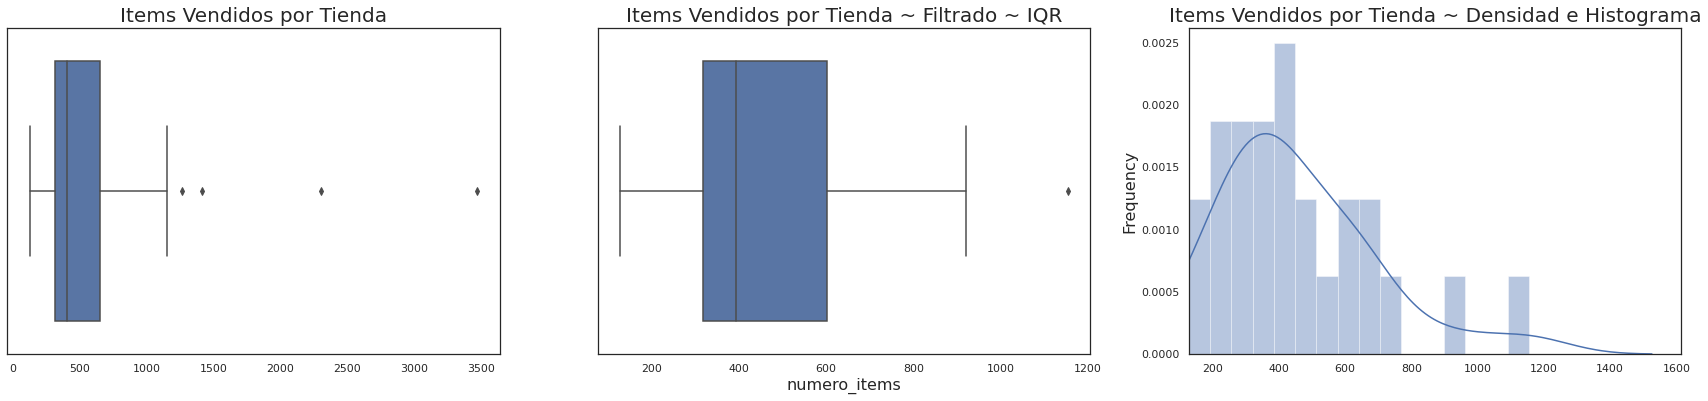

In [ ]:
graficas_boxplots_density(items_sold_per_tienda,0)

###Demanda de bicicletas (N√∫mero de Bicicletas Vendidas por Modelo)

>En esta ocasion se observa que los valores no cambian tras realizar el  Score de Rango intercuantilico. Por lo que se trabajara con los datos originales.

>Podemos observar en el boxplot que los datos se acumulan un poco hacia la cola derecha. Pero no de manera significativa. 

>Tras mirar el valor de la asimetria (0.05) se plantea que quiza la distribucion es normal, pero tras ver el grafico de histograma/densidad nos damos cuenta que nuestra distribucion es en realidad bimodal. 

>Por otro lado se tiene que la curtosis es de -1.31 lo que indica que los datos estan escarpados, por lo que hay una menor dispersion de los datos y con lo cual colas cortas.
>Finalmente se tiene una desviacion estandar de 47.30

Estimados de Locaci√≥n y Variabilidad ~ Datos Sin filtrar
Media ~ 207.5625
Mediana ~ 217.5
Media Truncada ~ 206.26923076923077
Desviacion Estandar ~ 47.300787241696206
Rango ~ 169
Quantil 75 ~ 245.25
Quantil 25 ~ 161.75
Rango Intercuantilico ~ 83.5
Curtosis: -1.318510004324263
Asimetr√≠a: 0.057352491941291286
Estimados de Locaci√≥n y Variabilidad ~ Datos Filtrados ~ Rango IQR
Media ~ 207.5625
Mediana ~ 217.5
Media Truncada ~ 206.26923076923077
Desviacion Estandar ~ 47.300787241696206
Rango ~ 169
Quantil 75 ~ 245.25
Quantil 25 ~ 161.75
Rango Intercuantilico ~ 83.5
Curtosis: -1.318510004324263
Asimetr√≠a: 0.057352491941291286


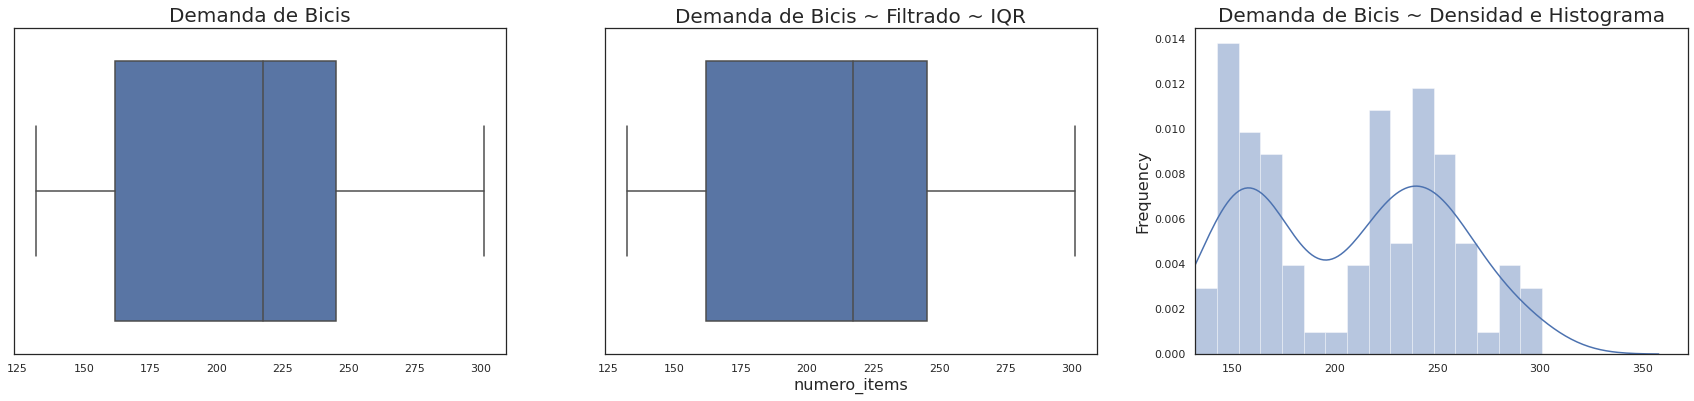

In [ ]:
graficas_boxplots_density(items_sold_per_bici,1)

###Ganancias por Bicicleta

Estimados de Locaci√≥n y Variabilidad ~ Datos Sin filtrar
Media ~ 763513.2291666666
Mediana ~ 605240.0
Media Truncada ~ 658677.4358974359
Desviacion Estandar ~ 597493.896186387
Rango ~ 3203125.0
Quantil 75 ~ 870122.5
Quantil 25 ~ 425915.0
Rango Intercuantilico ~ 444207.5
Curtosis: 5.989201051306221
Asimetr√≠a: 2.279435301127941
Estimados de Locaci√≥n y Variabilidad ~ Datos Filtrados ~ Rango IQR
Media ~ 619954.7727272727
Mediana ~ 564815.0
Media Truncada ~ 587433.1944444445
Desviacion Estandar ~ 322510.4217115959
Rango ~ 1436905.0
Quantil 75 ~ 764492.5
Quantil 25 ~ 422962.5
Rango Intercuantilico ~ 341530.0
Curtosis: 0.9184881537360754
Asimetr√≠a: 1.001783553644334


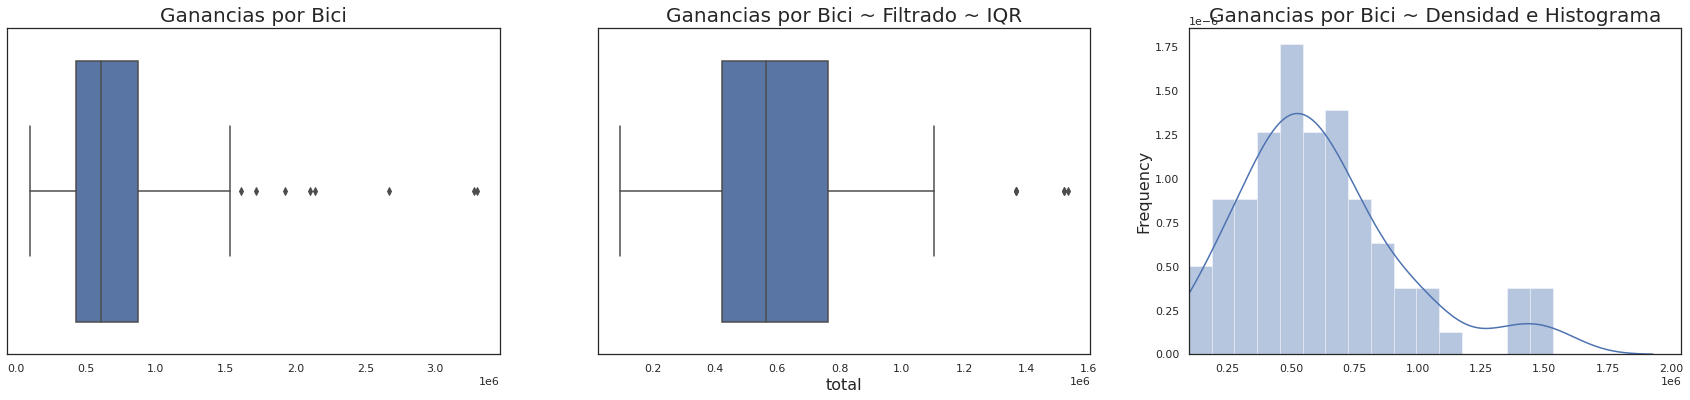

In [ ]:
graficas_boxplots_density(gains_per_bici,2)

###Ganancias Totales Por Tienda

Estimados de Locaci√≥n y Variabilidad ~ Datos Sin filtrar
Media ~ 2495311.896551724
Mediana ~ 1784195.0
Media Truncada ~ 2031787.6
Desviacion Estandar ~ 2527327.7547375625
Rango ~ 12067635.0
Quantil 75 ~ 2256410.0
Quantil 25 ~ 969910.0
Rango Intercuantilico ~ 1286500.0
Curtosis: 7.031233624707802
Asimetr√≠a: 2.6115810799010584
Estimados de Locaci√≥n y Variabilidad ~ Datos Filtrados ~ Rango IQR
Media ~ 1658820.0
Mediana ~ 1563795.0
Media Truncada ~ 1597420.238095238
Desviacion Estandar ~ 822136.4703979099
Rango ~ 3550320.0
Quantil 75 ~ 2159010.0
Quantil 25 ~ 958275.0
Rango Intercuantilico ~ 1200735.0
Curtosis: 0.6023836657968378
Asimetr√≠a: 0.7502937263092925


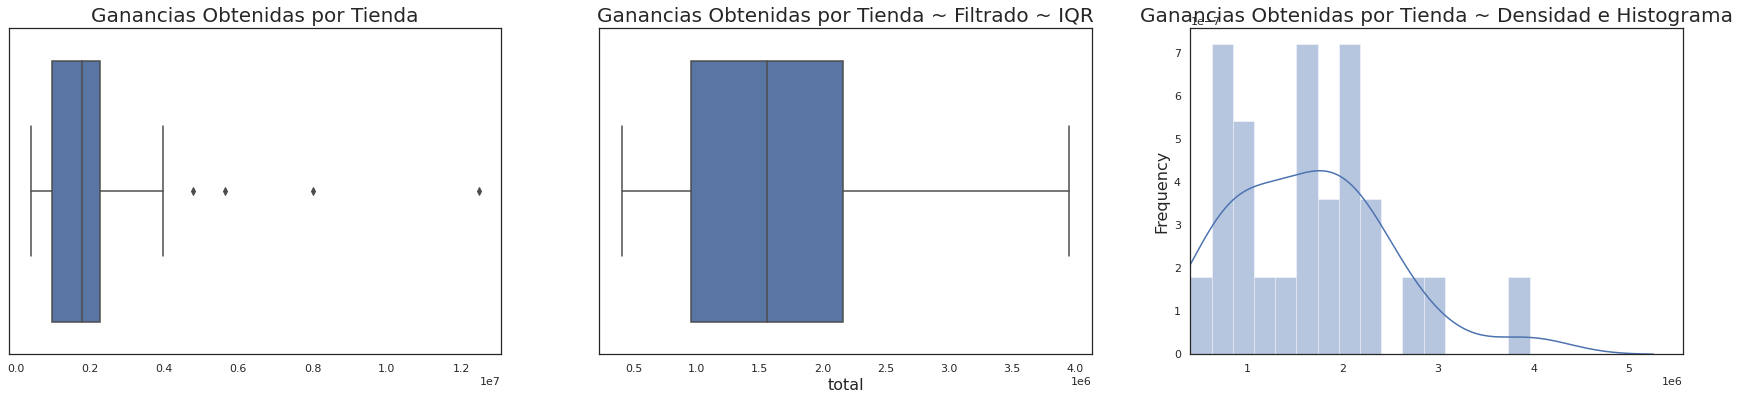

In [ ]:
graficas_boxplots_density(gains_per_tienda,3)

##Ganancias por Orden

>A continuacion se observa que gran parte de los datos estan concentrados hacia derecha de nuestro boxplot, de igual forma, se presentan demasiados valores atipivos concentrados a la izquierda de nuestro grafico (boxplot).

>A partir de aqui, se toma la decision de aplicar un filtro IQR de los datos, con la finalidad de evitar sesgos en el futuro, dado que los modelos de regresion son muy sensibles a datos atipicos, en otras palabras, se tiene un menor performance.

>Se tiene una asimetria postiva, lo que corrobora que los datos realmente estan cargados hacia la derecha de nuestro grafico.

>Finalmente la desviacion estandar disminuye en nuestros datos, lo que implica que estos estan menos dispersos a comparacion de nuestros datos raw.

Estimados de Locaci√≥n y Variabilidad ~ Datos Sin filtrar
Media ~ 36703.690535803704
Mediana ~ 19330.0
Media Truncada ~ 29558.11444652908
Desviacion Estandar ~ 40413.4346145569
Rango ~ 218790.0
Quantil 75 ~ 55565.0
Quantil 25 ~ 6080.0
Rango Intercuantilico ~ 49485.0
Curtosis: 1.568826649621295
Asimetr√≠a: 1.4416135705225044
Estimados de Locaci√≥n y Variabilidad ~ Datos Filtrados ~ Rango IQR
Media ~ 31910.0755995829
Mediana ~ 17920.0
Media Truncada ~ 26517.6171875
Desviacion Estandar ~ 33190.10045578376
Rango ~ 129175.0
Quantil 75 ~ 49710.0
Quantil 25 ~ 5860.0
Rango Intercuantilico ~ 43850.0
Curtosis: 0.37789929694173896
Asimetr√≠a: 1.1857613782781316


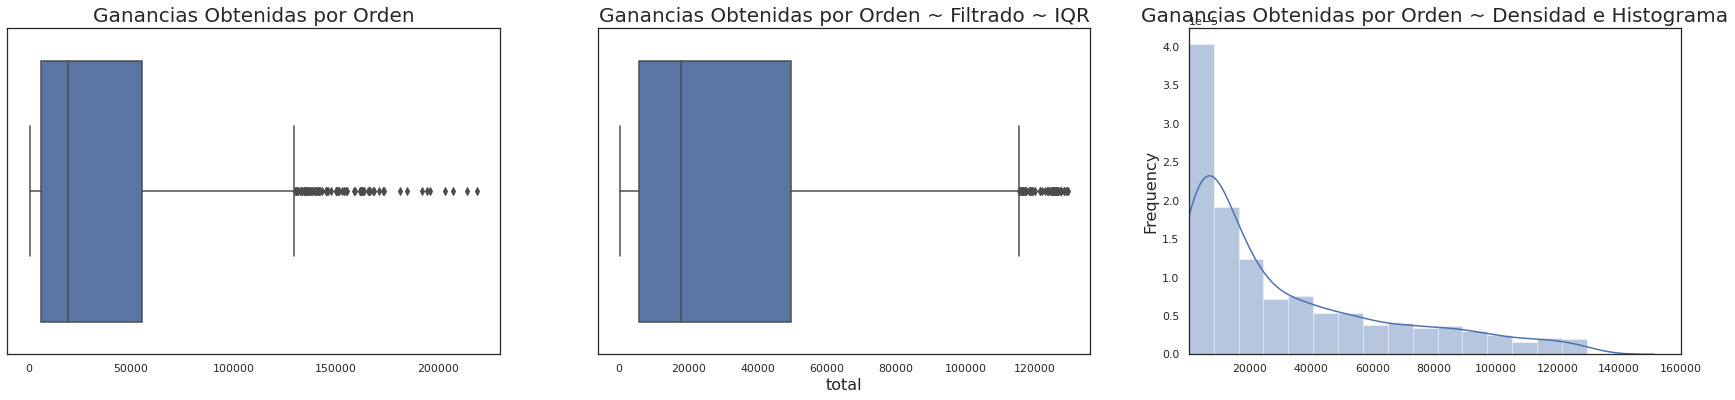

In [ ]:
graficas_boxplots_density(gain_per_order,4)

###Ganancias por Ciudad

Estimados de Locaci√≥n y Variabilidad ~ Datos Sin filtrar
Media ~ 2495311.896551724
Mediana ~ 1784195.0
Media Truncada ~ 2031787.6
Desviacion Estandar ~ 2527327.7547375625
Rango ~ 12067635.0
Quantil 75 ~ 2256410.0
Quantil 25 ~ 969910.0
Rango Intercuantilico ~ 1286500.0
Curtosis: 7.031233624707802
Asimetr√≠a: 2.6115810799010584
Estimados de Locaci√≥n y Variabilidad ~ Datos Filtrados ~ Rango IQR
Media ~ 1658820.0
Mediana ~ 1563795.0
Media Truncada ~ 1597420.238095238
Desviacion Estandar ~ 822136.4703979099
Rango ~ 3550320.0
Quantil 75 ~ 2159010.0
Quantil 25 ~ 958275.0
Rango Intercuantilico ~ 1200735.0
Curtosis: 0.6023836657968378
Asimetr√≠a: 0.7502937263092925


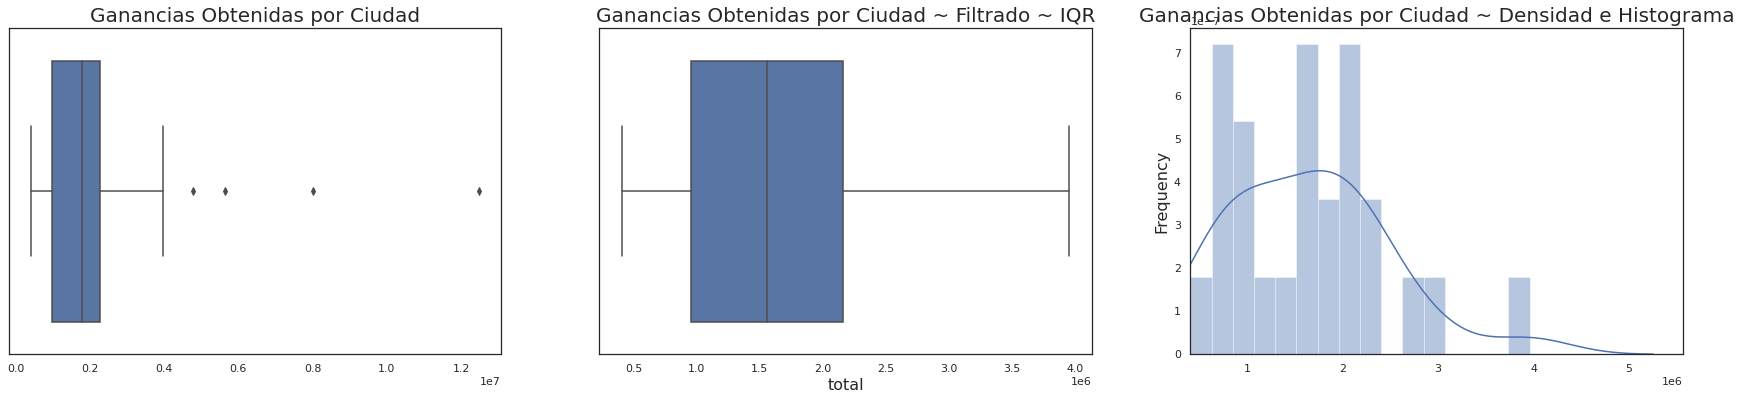

In [ ]:
graficas_boxplots_density(gain_per_city,5)

###Ganancias por Mes Generales

Estimados de Locaci√≥n y Variabilidad ~ Datos Sin filtrar
Media ~ 1221621.1666666667
Mediana ~ 1108715.0
Media Truncada ~ 1185452.0833333333
Desviacion Estandar ~ 513144.31856353977
Rango ~ 2165340.0
Quantil 75 ~ 1522216.25
Quantil 25 ~ 860363.75
Rango Intercuantilico ~ 661852.5
Curtosis: -0.49846149088064484
Asimetr√≠a: 0.611685483389598
Estimados de Locaci√≥n y Variabilidad ~ Datos Filtrados ~ Rango IQR
Media ~ 1221621.1666666667
Mediana ~ 1108715.0
Media Truncada ~ 1185452.0833333333
Desviacion Estandar ~ 513144.31856353977
Rango ~ 2165340.0
Quantil 75 ~ 1522216.25
Quantil 25 ~ 860363.75
Rango Intercuantilico ~ 661852.5
Curtosis: -0.49846149088064484
Asimetr√≠a: 0.611685483389598


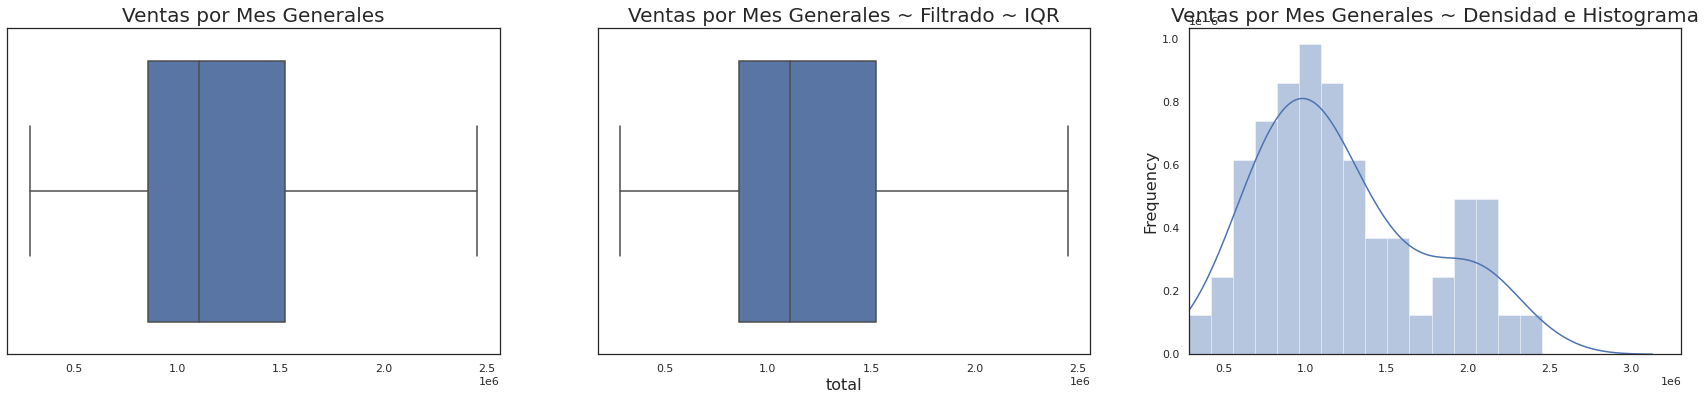

In [ ]:
graficas_boxplots_density(gain_per_month_from_all,6)

###Ganancias por Tienda

Estimados de Locaci√≥n y Variabilidad ~ Datos Sin filtrar
Media ~ 73665.59798994975
Mediana ~ 47250.0
Media Truncada ~ 59049.23462986198
Desviacion Estandar ~ 82340.32409519535
Rango ~ 632715.0
Quantil 75 ~ 107965.0
Quantil 25 ~ 13725.0
Rango Intercuantilico ~ 94240.0
Curtosis: 7.31178814592883
Asimetr√≠a: 2.2051532670797527
Estimados de Locaci√≥n y Variabilidad ~ Datos Filtrados ~ Rango IQR
Media ~ 61874.6537250787
Mediana ~ 44020.0
Media Truncada ~ 53614.94102228047
Desviacion Estandar ~ 58437.93117205539
Rango ~ 248055.0
Quantil 75 ~ 97500.0
Quantil 25 ~ 12230.0
Rango Intercuantilico ~ 85270.0
Curtosis: 0.3838989426925008
Asimetr√≠a: 1.0528982372863764


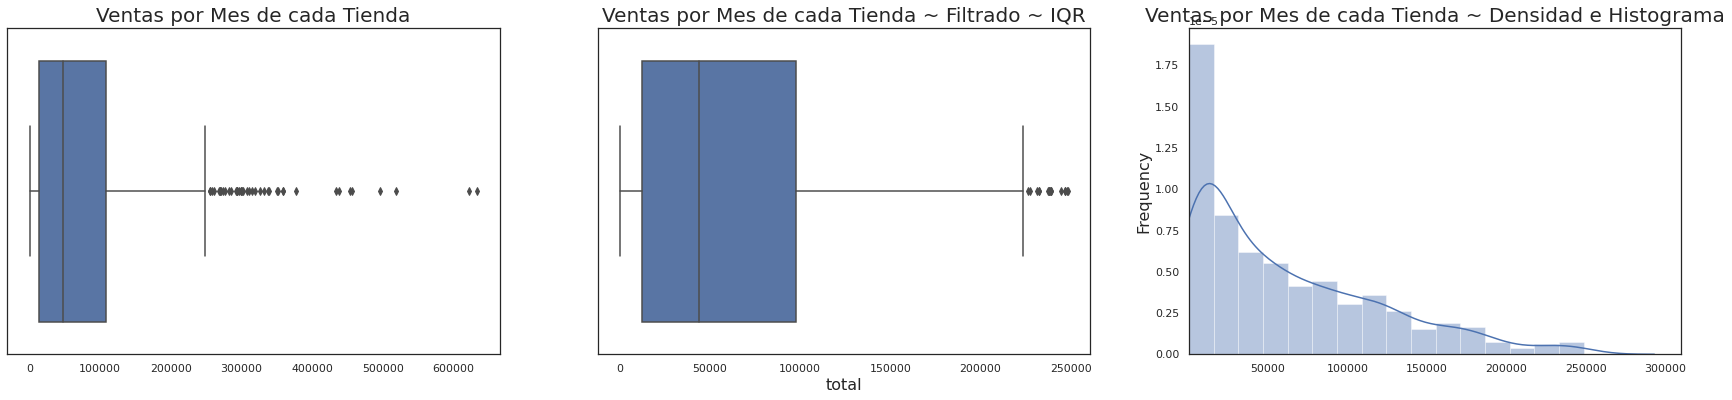

In [ ]:
graficas_boxplots_density(gain_per_month_per_tienda,7)

###Ganancias Totales Recaudadas por cada Bicicleta

>Como se observa a continuacion, se presentan demasiados valores atipicos, lo cual puede afectar gravemente nuestro modelos al momento de predecir nuevos valores en el tiempo.

>Claramente puede observarse el cambio dastrico, donde en un principio se tiene una curtosis de 48.48 mientras que en los datos filtrados se tiene una de .046, esto indica que se tiene una distribucion semi normal, puesto que como podemos observar, realmente se tiene una dispersion positiva, con un valor de 1.09, lo que nos indica que hay mas datos concentrados en la cola derecha de nuestros graficos.

>Finalmente, los valores con diferencias mas significativas son la desviacion estandar de 2817 y rango de 90,600.

Estimados de Locaci√≥n y Variabilidad ~ Datos Sin filtrar
Media ~ 4743.545819311416
Mediana ~ 3200.0
Media Truncada ~ 3786.4415143180713
Desviacion Estandar ~ 5430.5235834880605
Rango ~ 101905.0
Quantil 75 ~ 5865.0
Quantil 25 ~ 1950.0
Rango Intercuantilico ~ 3915.0
Curtosis: 48.48418754246366
Asimetr√≠a: 5.23855602511539
Estimados de Locaci√≥n y Variabilidad ~ Datos Filtrados ~ Rango IQR
Media ~ 3727.750328696976
Mediana ~ 2820.0
Media Truncada ~ 3385.733068073696
Desviacion Estandar ~ 2613.401803602288
Rango ~ 11305.0
Quantil 75 ~ 5330.0
Quantil 25 ~ 1840.0
Rango Intercuantilico ~ 3490.0
Curtosis: 0.46918673314780346
Asimetr√≠a: 1.090231251226898


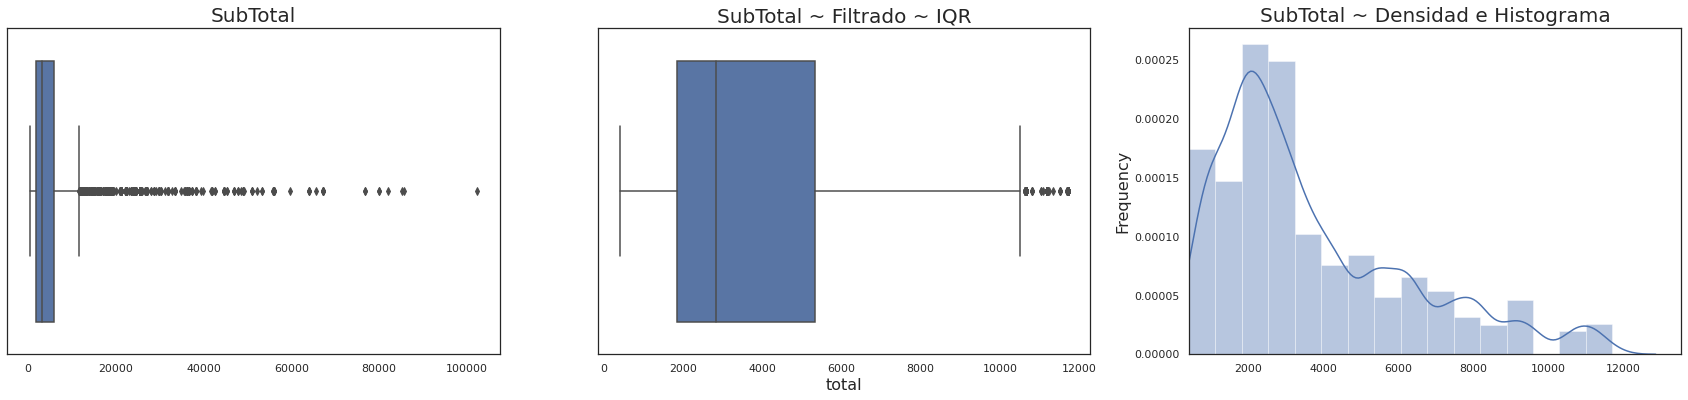

In [ ]:
graficas_boxplots_density(or_bikes['total'],8)

###Edad de Clientes (No implica que hayan adquirido una bicicleta)

Como se observa, los datos estan cargados hacia la derecha, presentando valores atipicos. Cabe mencionar que no son demasiados, de igual forma se har√° un analisis mas profundo.

> 

Estimados de Locaci√≥n y Variabilidad ~ Datos Sin filtrar
Media ~ 44.21494370522006
Mediana ~ 43.0
Media Truncada ~ 43.51979565772669
Desviacion Estandar ~ 11.422891069746523
Rango ~ 64
Quantil 75 ~ 52.0
Quantil 25 ~ 35.0
Rango Intercuantilico ~ 17.0
Curtosis: -0.293753961169013
Asimetr√≠a: 0.5167440305592742
Estimados de Locaci√≥n y Variabilidad ~ Datos Filtrados ~ Rango IQR
Media ~ 44.06269270298047
Mediana ~ 43.0
Media Truncada ~ 43.43132220795892
Desviacion Estandar ~ 11.192258115013455
Rango ~ 49
Quantil 75 ~ 52.0
Quantil 25 ~ 35.0
Rango Intercuantilico ~ 17.0
Curtosis: -0.5716312910593171
Asimetr√≠a: 0.4362294430828557


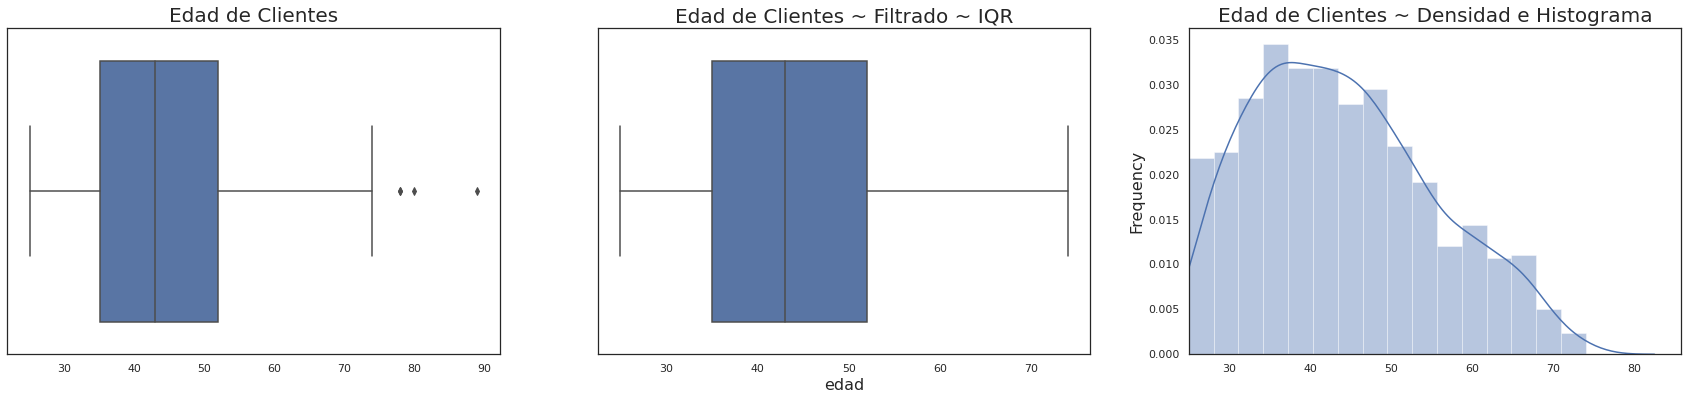

In [ ]:
graficas_boxplots_density(compradores['edad'],9)

###Edad de Compradores de Bicicletas 

Estimados de Locaci√≥n y Variabilidad ~ Datos Sin filtrar
Media ~ 42.94882729211088
Mediana ~ 41.0
Media Truncada ~ 42.244031830238725
Desviacion Estandar ~ 10.151709453013265
Rango ~ 53
Quantil 75 ~ 50.0
Quantil 25 ~ 36.0
Rango Intercuantilico ~ 14.0
Curtosis: 0.07974383595770762
Asimetr√≠a: 0.6508213514415992
Estimados de Locaci√≥n y Variabilidad ~ Datos Filtrados ~ Rango IQR
Media ~ 42.61422413793103
Mediana ~ 41.0
Media Truncada ~ 42.04838709677419
Desviacion Estandar ~ 9.674613985489456
Rango ~ 45
Quantil 75 ~ 49.0
Quantil 25 ~ 36.0
Rango Intercuantilico ~ 13.0
Curtosis: -0.3452502039211973
Asimetr√≠a: 0.5015192349211411


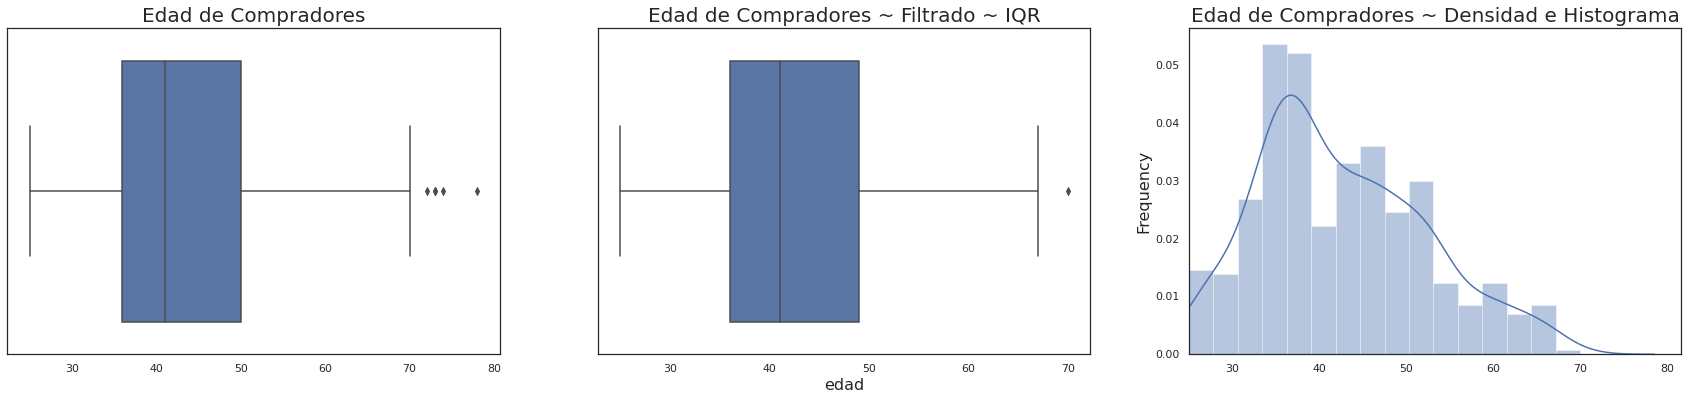

In [ ]:
graficas_boxplots_density(real_buyers['edad'],10)

###Salario de Clientes (No necesariamente compraron una bicicleta)

> De primeras se observa en el boxplot que hay valores atipicos que muy probablemente afecten a la distribucion de nuestros datos. 

> Mas detalladamente se observa una disminucion en los valores de locacion y variabilidad. Los mas significativos son la mediana y la desviacion estandar. Donde se tienen diferencias de 10000 y 4669 respectivamente.

>Por otra parte se observa una distribucion bimodal, donde los datos estan mas cargados hacia la derecha. Como era de esperarse se tiene una menor dispercion de los datos tras aplicar IQR~Score. Donde la desviacion estandar disminuye significativamente.

Estimados de Locaci√≥n y Variabilidad ~ Datos Sin filtrar
Media ~ 56161.71954964176
Mediana ~ 60000.0
Media Truncada ~ 53524.904214559385
Desviacion Estandar ~ 31249.695872473487
Rango ~ 160000.0
Quantil 75 ~ 70000.0
Quantil 25 ~ 30000.0
Rango Intercuantilico ~ 40000.0
Curtosis: 0.4942871050350126
Asimetr√≠a: 0.7594170325729712
Estimados de Locaci√≥n y Variabilidad ~ Datos Filtrados ~ Rango IQR
Media ~ 52534.75935828877
Mediana ~ 50000.0
Media Truncada ~ 51401.86915887851
Desviacion Estandar ~ 26580.503157298106
Rango ~ 110000.0
Quantil 75 ~ 70000.0
Quantil 25 ~ 30000.0
Rango Intercuantilico ~ 40000.0
Curtosis: -0.4925853904421462
Asimetr√≠a: 0.3342536460850532


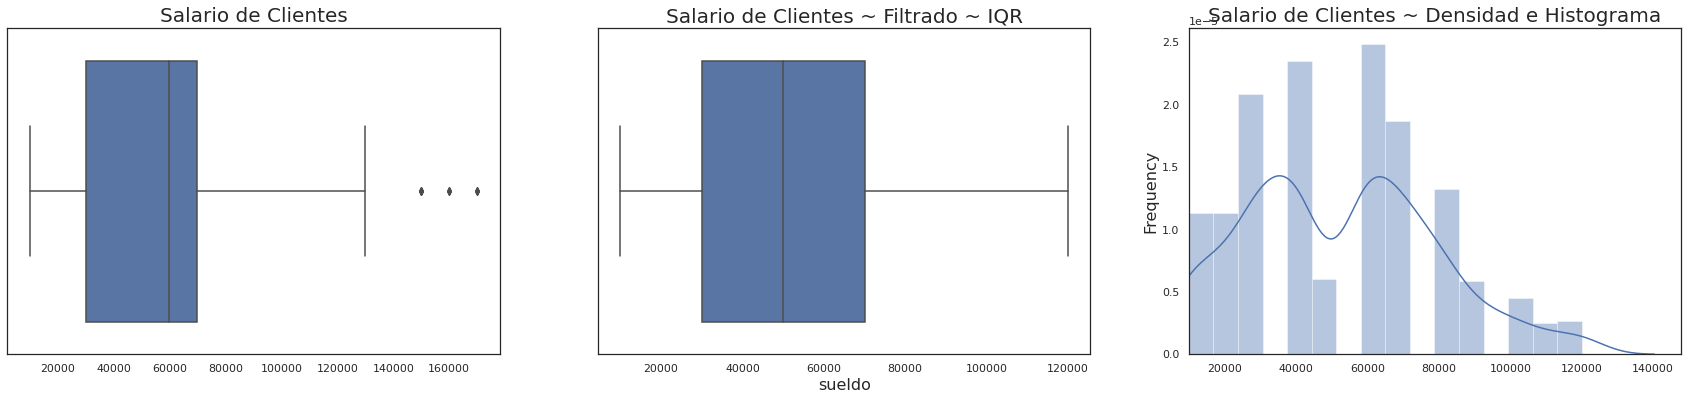

In [ ]:
graficas_boxplots_density(compradores['sueldo'],11)

###Salario de Compradores

>Se puede observar que nuestra distribucion de los datos es bimodal, donde ciertamente era de esperarse tras analizar los datos anteriores.

>Nuevamente los datos estan mas cargados hacia la cola derecha. Tras ver el primer boxplost se observan valores atipicos. Por lo que el IQR~Rango nos vendra bien. Donde estos desaparecen, y con lo cual la dispersion de nuestros datos es menor. Obteniendo una Curtosis final de -.65 aproximadamente. 

Estimados de Locaci√≥n y Variabilidad ~ Datos Sin filtrar
Media ~ 57846.481876332626
Mediana ~ 60000.0
Media Truncada ~ 55119.36339522547
Desviacion Estandar ~ 31123.030837207913
Rango ~ 160000.0
Quantil 75 ~ 70000.0
Quantil 25 ~ 40000.0
Rango Intercuantilico ~ 30000.0
Curtosis: 0.7026298388925971
Asimetr√≠a: 0.8229446331564987
Estimados de Locaci√≥n y Variabilidad ~ Datos Filtrados ~ Rango IQR
Media ~ 52511.41552511416
Mediana ~ 60000.0
Media Truncada ~ 51931.818181818184
Desviacion Estandar ~ 24327.920081144235
Rango ~ 100000.0
Quantil 75 ~ 70000.0
Quantil 25 ~ 30000.0
Rango Intercuantilico ~ 40000.0
Curtosis: -0.654583100137395
Asimetr√≠a: 0.16745210850266964


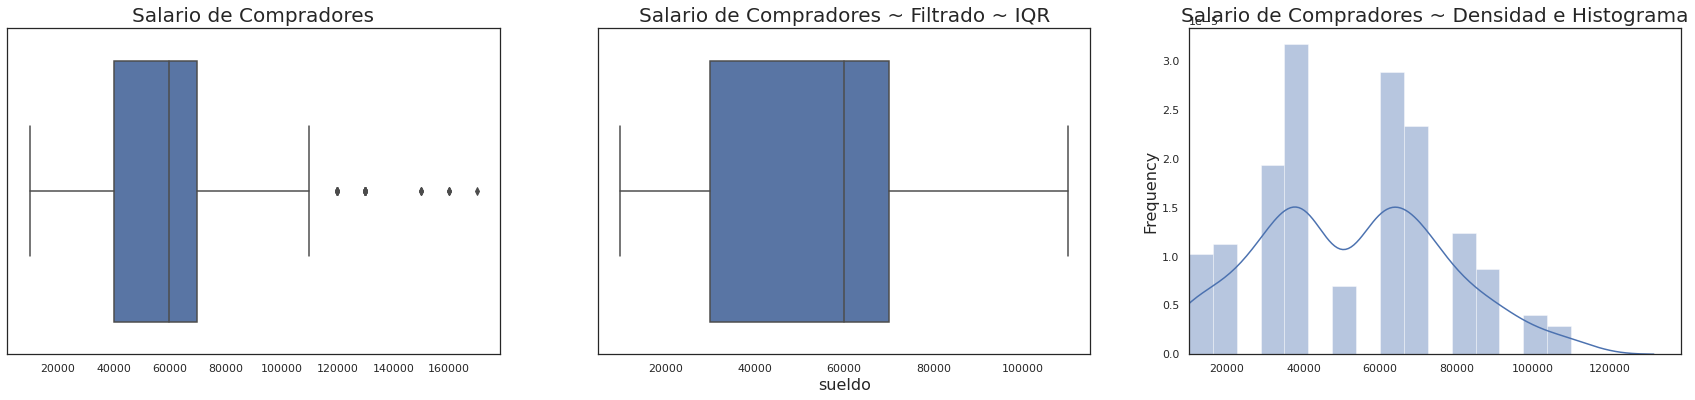

In [ ]:
graficas_boxplots_density(real_buyers['sueldo'],12)

##Conclusion General

>Cuando se hace una primera investigacion de nuestros datos por medio de un boxplot tendremos la posibilidad de observar valores atipicos que nos daran una idea de que tanto estos afectaran los valores de locacion y variabilidad, los cuales juegan un papel importante en el performance(desempe√±o) de nuestros modelos.

> Donde si se tienen demasiados, o por el contario valores atipicos bastante alejados de la media y mediana, es recomendable hacer un filtro Intercuart√≠lico de nuestros datos, o mejor conocido como Score de Rango Intercuart√≠lico.

> Nunca hay que dejarse llevar por los valores de simetria obtenidos, dado que al realizar un grafico de histograma/densidad podremos darnos cuenta que aun que nuestro valor de simetria nos indique que es una distribucion normal, quiza sea en realidad bimodal o segun sea el caso, multimodal.

#PostWork3
>Agregar anotaciones y t√≠tulos a las gr√°ficas que hemos hecho hasta el momento.
Realizar gr√°ficas de barras para explorar la distribuci√≥n de variables categ√≥ricas.

>Realizar tablas de contingencia y gr√°ficas con m√∫ltiples axes para explorar dos o m√°s variables categ√≥ricas.

>Usar boxplots y violinplots para explorar variables num√©ricas segmentadas por variables categ√≥ricas.

###Datos a trabajar

In [ ]:
educacion = compradores['educacion'].value_counts()
estado_civ = compradores['estado_civil'].value_counts()
dist_viaje = compradores['distancia_d_viaje'].value_counts()
autos = compradores['autos'].value_counts()
profesion = compradores['profesion'].value_counts()# Grupo 1
modelo_bike = str_or_bks['modelo'].value_counts()
cat_1_bks = str_or_bks['categoria_1'].value_counts()
cat_2_bks = str_or_bks['categoria_2'].value_counts()
aleacion = str_or_bks['aleacion'].value_counts()
tiendas = str_or_bks['nombre_tienda'].value_counts() # Grupo 2  
# Se tienen 10 datos Categoricos, Divididos en dos Grupos. 

###Tablas de Contingencia

In [ ]:
def tablas_conting_2(x,y):#Luego meto el return 
  return pd.crosstab(x,y)

def tablas_conting_3(x,y,z):
  return pd.crosstab(x,[y,z])

##Funcion para Graficar Tablas de Contingencia

In [ ]:
def graph_conting(o,i):
  sizess = o.shape;
  if(i==1):
    names = o.index;                        #(Cantidad de filas   , #Cantidad de Columnas)
    fig, axes = plt.subplots(1,sizess[0] , figsize=(14, 6), sharex=True, sharey=True);
    #fig.suptitle('Ratings de restaurantes separados por rango de precio', fontsize=15);
    j=0
    for i in names:
      j
      sns.barplot(o.columns, o.loc[i], ax=axes[j]);
      axes[j].set_xticklabels(axes[j].get_xticklabels(), rotation=50,fontsize=13);
      axes[j].set_ylabel(names[j],fontsize=15)
      axes[j].set_xlabel('')
      j += 1
  if(i==2):
    names = o.index;                        #(Cantidad de filas   , #Cantidad de Columnas)
    fig, axes = plt.subplots(1,sizess[0] , figsize=(20, 4), sharex=True, sharey=True);
    j=0
    for i in names:
      j
      sns.barplot(o.columns, o.loc[i], ax=axes[j]);
      axes[j].set_xticklabels(axes[j].get_xticklabels(), rotation=50,fontsize=13);
      axes[j].set_ylabel(names[j],fontsize=15)
      axes[j].set_xlabel('')
      j += 1
  else:
    names = o.columns;
    title = o.columns.names;
    c= title[0] +' ~ ' + title[1]
    fig, axes = plt.subplots(2,sizess[0] , figsize=(30, 10), sharex=True, sharey=True);
    fig.suptitle(c, fontsize=15);
    r=0
    j=0
    for i in names:
      sns.barplot(o.index, o[i], ax=axes[r,j]);
      axes[r, j].set(xlabel='', ylabel='');
      axes[r,j].set_title(i,fontsize=14)
      axes[r,j].set_xticklabels(axes[r,j].get_xticklabels(), rotation=50,fontsize=13);
      j += 1
      if(j==(sizess[1]/2)):
        r=1
        j=0

##Educacion y Estado Civil

Se observa que aquellos que estan casados tienen un mejor escolaridad que aquellos que estan solteros.

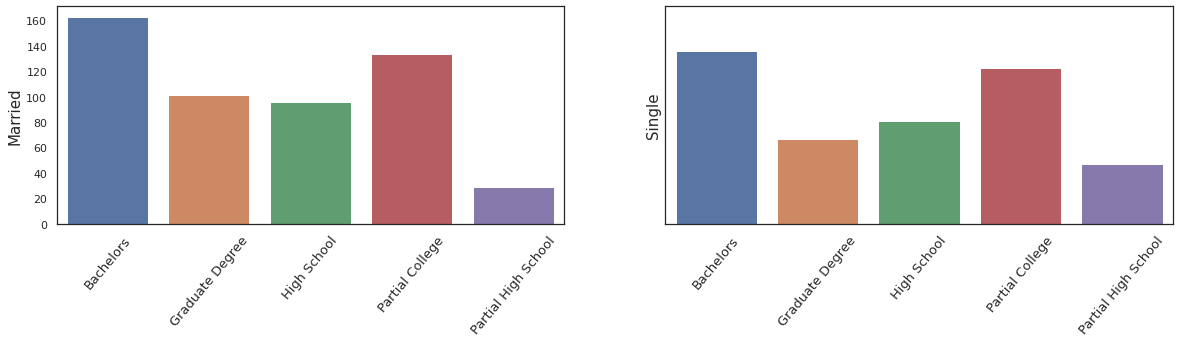

In [ ]:
o=pd.crosstab(compradores['estado_civil'],compradores['educacion'])
#o.index
graph_conting(o,2)

## Profesion , Educacion y Compra de Bicicleta

In [ ]:
pd.crosstab(compradores['profesion'],[compradores['bicicleta_adquirida'],compradores['educacion']], margins=True, margins_name='total') #No me interesan mucho estos datos, quiza si les agrego un tercer nivel. 

bicicleta_adquirida        No                                              \
educacion           Bachelors Graduate Degree High School Partial College   
profesion                                                                   
Clerical                   15               6           2              45   
Management                 57              31           6               3   
Manual                      2               4          22              13   
Professional               36              13          30              43   
Skilled Manual             25              22          40              37   
total                     135              76         100             141   

bicicleta_adquirida                           Yes                              \
educacion           Partial High School Bachelors Graduate Degree High School   
profesion                                                                       
Clerical                             21        33              17           2   
Management                            0        40              25           6   
Manual                               22         0               2          21   
Professional                          0        53              31          24   
Skilled Manual                       13        38              17          24   
total                                56       164              92          77   

bicicleta_adquirida                                     total  
educacion           Partial College Partial High School        
profesion                                                      
Clerical                         31                   3   175  
Management                        2                   0   170  
Manual                           20                   9   115  
Professional                     34                   4   268  
Skilled Manual                   29                   4   249  
total                           116                  20   977

>Se puede observar a continuacion que aquellos que adquirieron una bicicleta en gran medida fueron los que tienen una profesion "profesional". Mientras que el grupo laboral que no adquirio una bicicleta se conforma por aque√±os que tienen una vida laboral de "management.


>Como era de esperarse, entre mayor es la escolaridad y mejor la profesion laboral, mayor es la probabilidad de que los consumidores compren una bicicleta. 

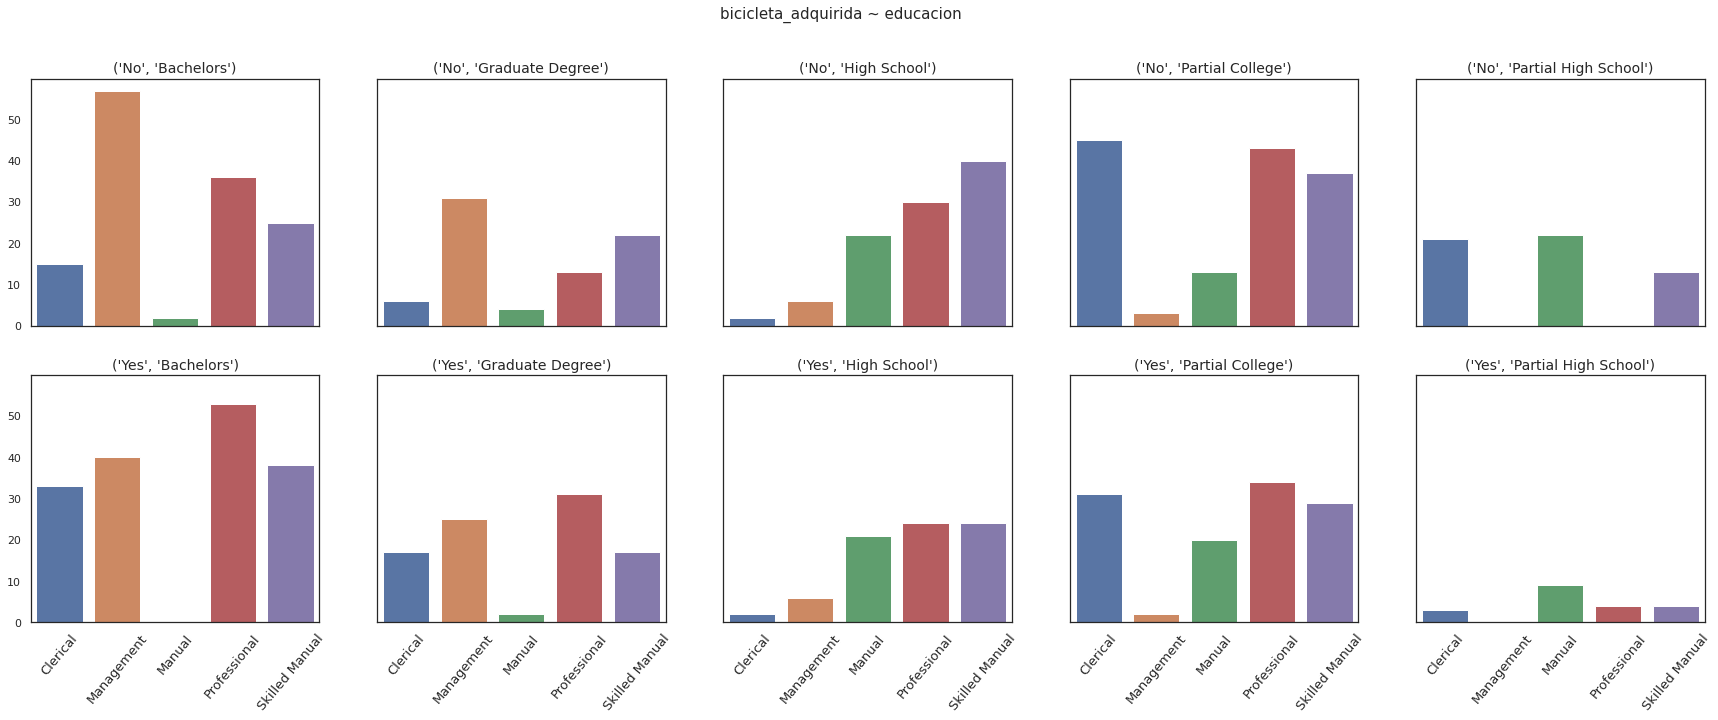

In [ ]:
o=pd.crosstab(compradores['profesion'],[compradores['bicicleta_adquirida'],compradores['educacion']]) #No me interesan mucho estos datos, quiza si les agrego un tercer nivel. 
graph_conting(o,3)

## Autos ~ Adquisicion de Bicicleta ~ Distancia de Viaje

##Distancia de Viaje y Adquisicion de Bicicleta

>Se presenta que el grupo que compra mas bicicletas es aquel que no tiene autos. mientras que aquellas poblaciones que tienen mas de 4 por lo regular no adquieren ninguna como se muestra a continuacion. 

##Autos y Distancia recorrida

In [ ]:
pd.crosstab(compradores['autos'],compradores['distancia_d_viaje'])

distancia_d_viaje  0-1 Miles  1-2 Miles  10+ Miles  2-5 Miles  5-10 Miles
autos                                                                    
0                        162         30          4         35           8
1                         82         48         13         71          47
2                         75         75         43         37         106
3                         16          8         32          8          19
4                         16          7         18          8           9

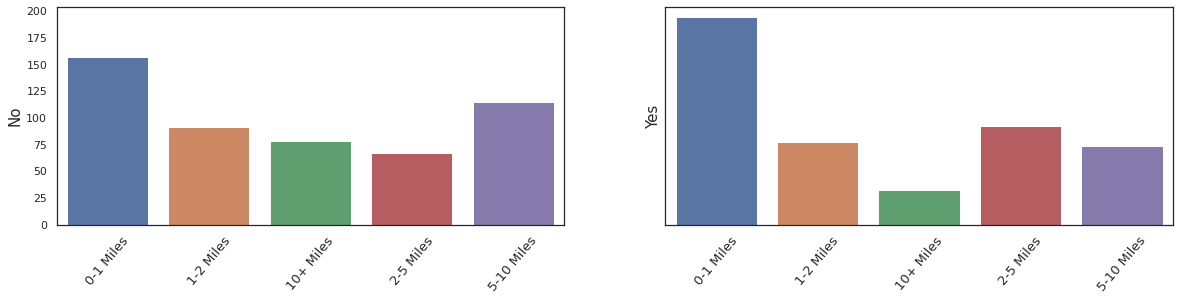

In [ ]:
o = tablas_conting_2(compradores['bicicleta_adquirida'],compradores['distancia_d_viaje']);
graph_conting(o,2)

###Distancia de Viaje y Autos

Como podemos ver, entre menos sea la distancia que una persona tenga que recorrer para llegar a su punto de encuentro (por asi llamarlo), se tiende a no necesitar un auto como medio de transporte. 

>Por otra parte se tiene que aquellos que tienen 2 autos presentan una distribucion mas uniforme respecto al numero de autos y la distancia de viaje. 

> Finalmente, todos los valores decrecen conforme se tienen mas autos. Como se puede observar en las siguientes graficas.

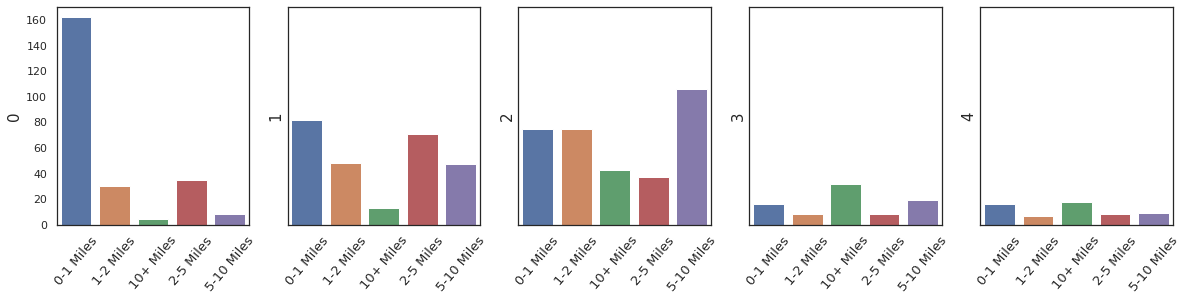

In [ ]:
o = pd.crosstab(compradores['autos'],compradores['distancia_d_viaje'])
#o.shape # (5,5)
graph_conting(o,2)

>Como era de suponerse se tiene que entre menos autos, mayor es la probabilidad de adquirir una bicicleta, en especial cuando se tienen que recorrer las menores millas posibles. 

>Cabe mencionar que cuando se tienen dos autos, menor es la probabilidad de compra como podemos observar a continuacion. 

###Distancia de Viaje, Adquision de Bicicleta(Yes/No) y Autos(0,1,2,3,4)

Aquellos que recorren una distancia menor, son los que tienden a comprar mas bicicletas. Mientras que aquellos que recorren una mayor distancia son los que en general deciden no comprar una bicicleta. 

Finalemente se tiene que entre mas autos una persona/familia tenga, se tiene una menor compra de bicicletas. Donde el cambio mas representativo ocurre cuando se tienen mas de 2 autos. Y cuando estos recorren mas de 5 millas.

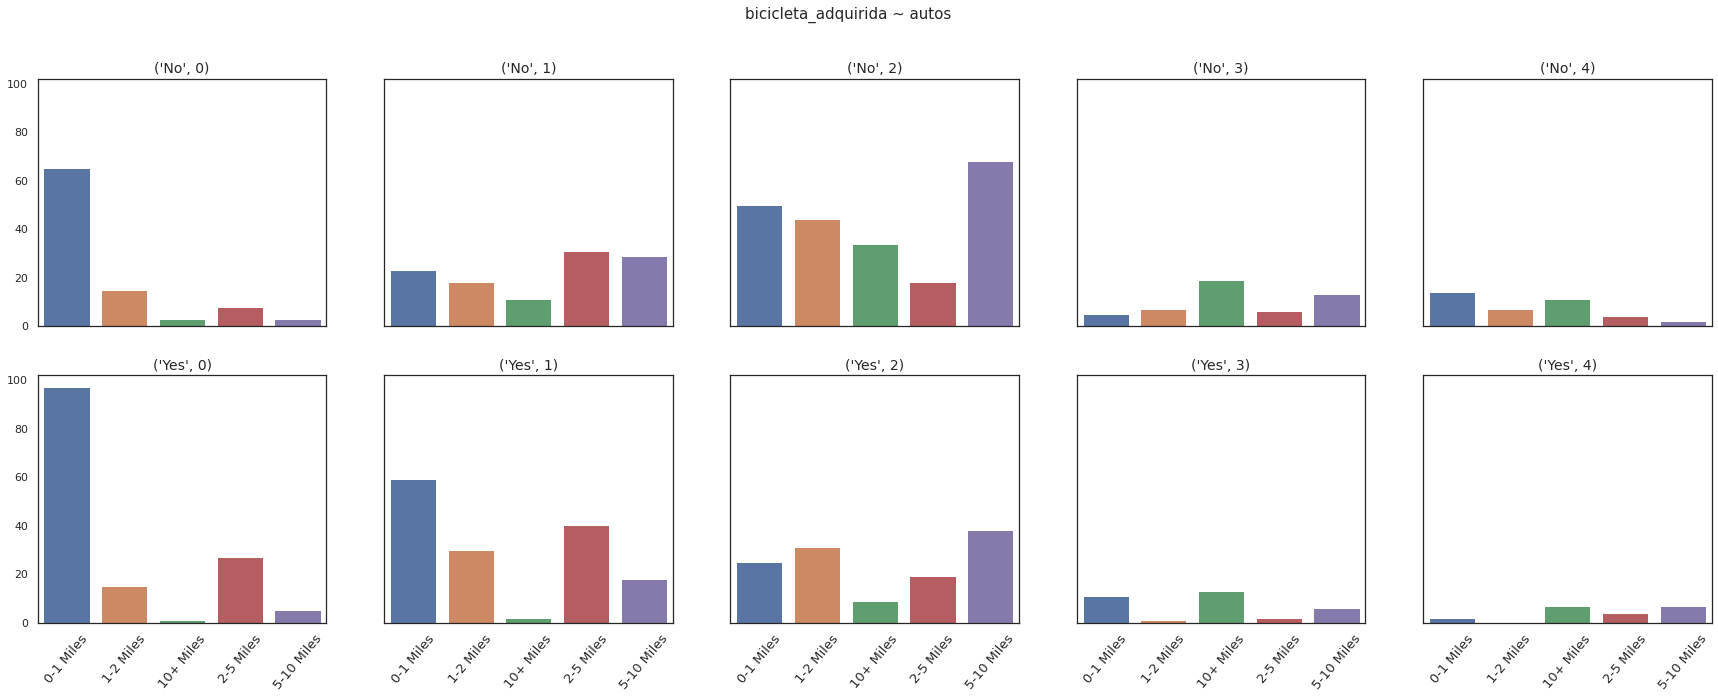

In [ ]:
o = tablas_conting_3(compradores['distancia_d_viaje'],compradores['bicicleta_adquirida'],compradores['autos'])
graph_conting(o,3)

##Genero ~ Estado Civil ~ Adquisicion de Bicicleta

###Genero y Adquisicion de Bicicleta

In [ ]:
o = pd.crosstab(compradores['genero'],compradores['bicicleta_adquirida'])

In [ ]:
pd.crosstab(compradores['genero'],compradores['bicicleta_adquirida'])

bicicleta_adquirida   No  Yes
genero                       
Female               250  236
Male                 258  233

###Estado Civil y Genero

In [ ]:
o = pd.crosstab(compradores['estado_civil'],compradores['genero'])

In [ ]:
pd.crosstab(compradores['estado_civil'],compradores['genero'])

genero        Female  Male
estado_civil              
Married          238   285
Single           248   206

##Estado Civil, Genero y Adqusicion de Bicicleta

In [ ]:
pd.crosstab(compradores['estado_civil'],[compradores['bicicleta_adquirida'],compradores['genero']], margins=True, margins_name='total')

bicicleta_adquirida     No         Yes      total
genero              Female Male Female Male      
estado_civil                                     
Married                131  168    107  117   523
Single                 119   90    129  116   454
total                  250  258    236  233   977

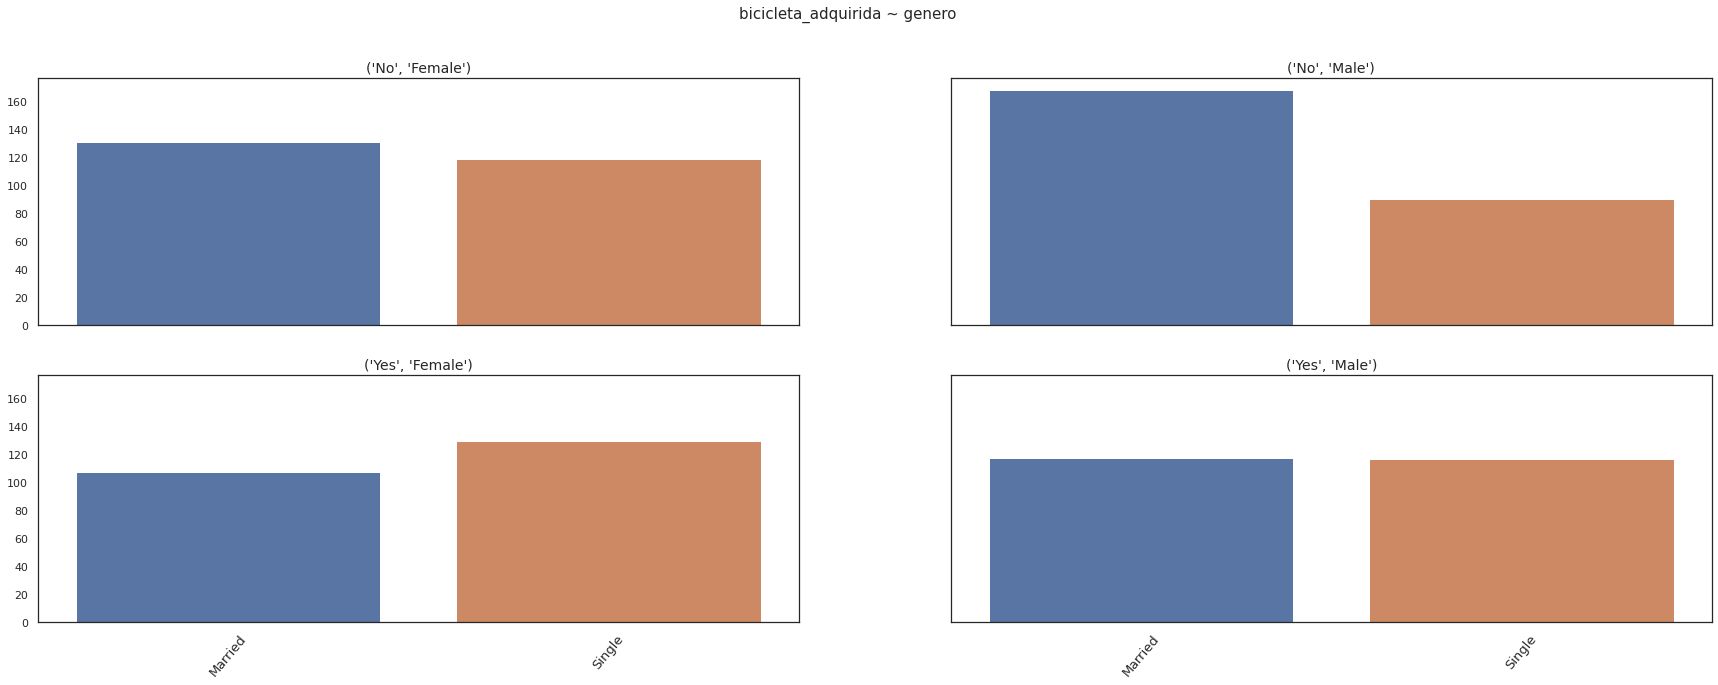

In [ ]:
o = pd.crosstab(compradores['estado_civil'],[compradores['bicicleta_adquirida'],compradores['genero']])
graph_conting(o,3)

*texto en cursiva*#Funcion para Graficos de Barras

In [ ]:
def porcentajes_data(x):
  return x*100/x.sum()

In [ ]:
def bar_plots(x,i,s,t):
  sns.set(style="white")
  fig, axes = plt.subplots(figsize=(s,t))
  o=['Educacion','Estado Civil','Distancia Viajada','Autos','Profesion','Modelo ~ Bicicleta','Categoria 1 ~ Bicicletas','Categoria 2 ~ Bicicletas','Aleacion','Tiendas']
  a='Conteo ~ '
  b=' ~ Porcentaje'
  c=a+o[i]+b
  ax = sns.barplot(x.index, porcentajes_data(x))
  #sns.set(rc={'figure.figsize':})
  ax.set_title(c,fontsize=15)
  ax.set(ylabel='porcentaje del total'); 
  ax.set_xticklabels(ax.get_xticklabels(), rotation=70, fontsize= 15);

##Datos Filtrados ~ Compraron una Bicicleta

In [ ]:
educacion_2 = real_buyers['educacion'].value_counts()
estado_civ_2 = real_buyers['estado_civil'].value_counts()
dist_viaje_2 = real_buyers['distancia_d_viaje'].value_counts()
autos_2 = real_buyers['autos'].value_counts()
profesion_2 = real_buyers['profesion'].value_counts()# Grupo 1

##Nota
>No se agrega una descripcion aquellos graficos que van en decremento, pues los resultados que se obtienen son bastante claros, dado que se observa que aquellos que tienen mas impacto van en orden decreciente a comparacion del resto. Como el siguiente grafico que se presenta a continuacion. (Educacion)

>Los que tienen un titulo son los que compraron mas bicicletas, seguido de aquellos que no terminaron la universidad, luego, estan aquellos que tienen un doctorado/maestria, seguido de aquellos que terminaron la prepa y finalmente los que no la terminaron.

###Educacion

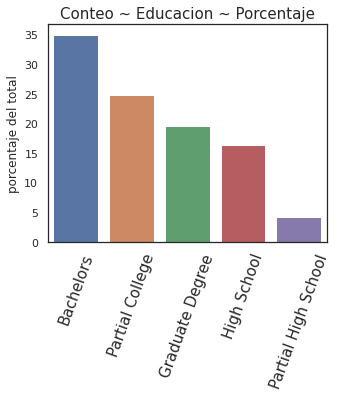

In [ ]:
bar_plots(educacion_2,0,5,4)

###Autos

Increiblemente aquellos que tienen 1 auto, compraron mas bicis que aquellos que no tienen ninguno.

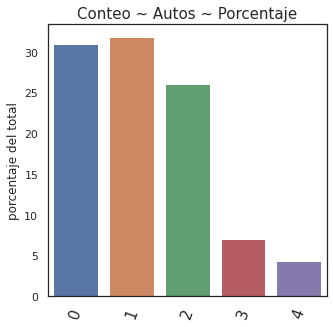

In [ ]:
bar_plots(autos_2,3,5,5)

###Estado Civil

Los solteros compraron mas que los casados, algo inesperado. Puesto que si tienes una pareja, por obvio seria comprar dos, y por lo tanto, se tendria un mayor numero.

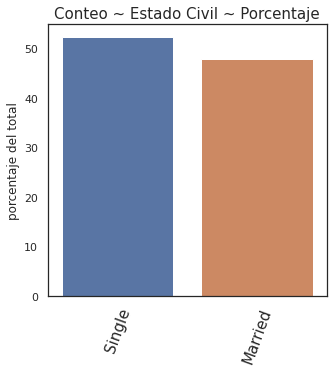

In [ ]:
bar_plots(estado_civ_2,1,5,5) 

###Profesion

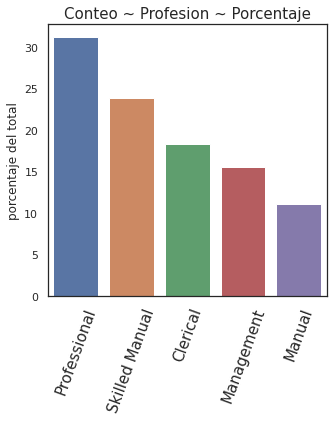

In [ ]:
bar_plots(profesion_2,4,5,5)

Aleacion

###Modelos de Bicicletas Vendidas (Primeras 20)

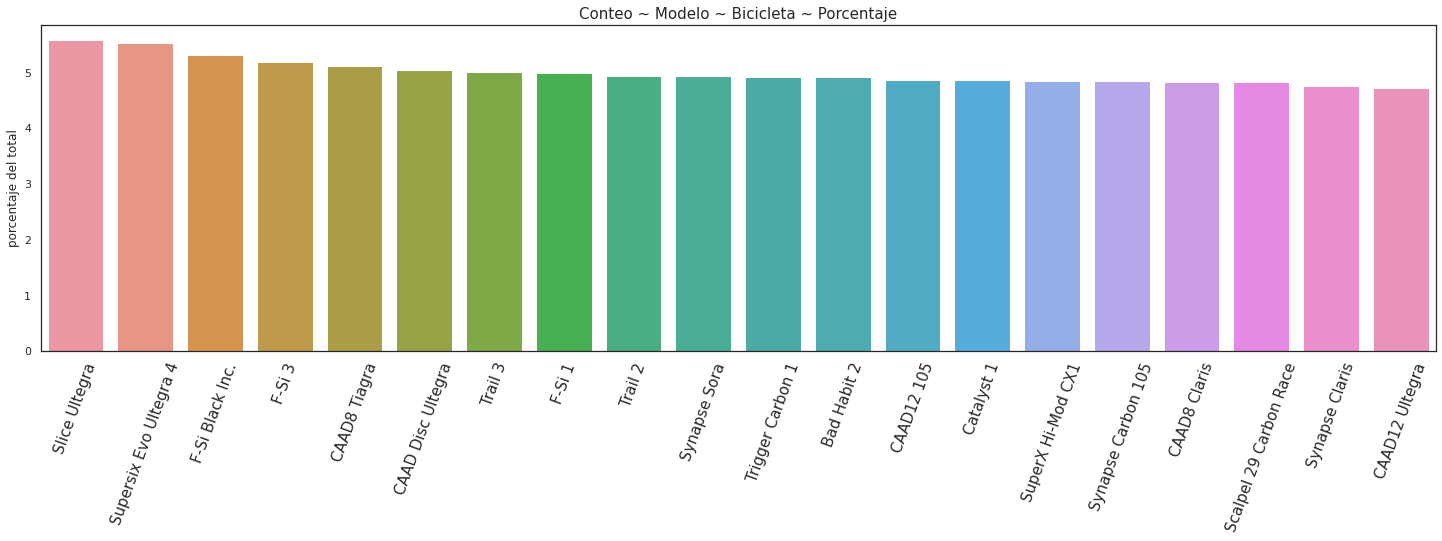

In [ ]:
bar_plots(modelo_bike.head(20),5,25,6)

###Categoria 1 ~ Road y Mountain

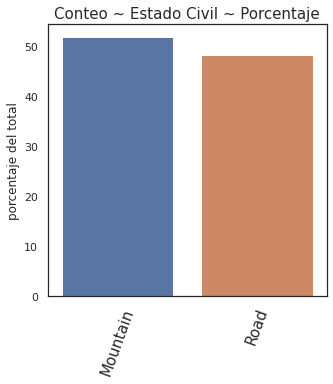

In [ ]:
bar_plots(cat_1_bks,1,5,5)

###Categoria 2 ~ 

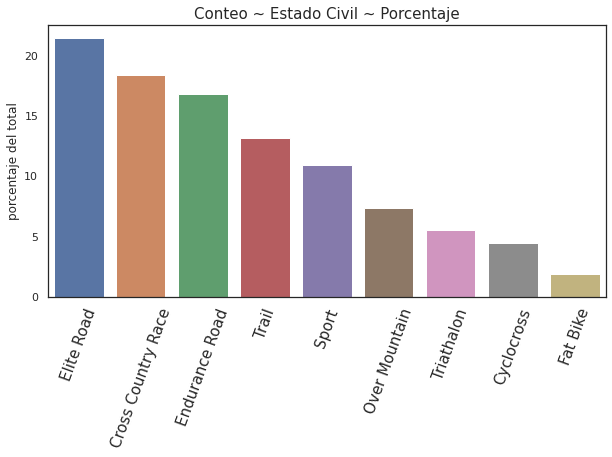

In [ ]:
bar_plots(cat_2_bks,1,10,5)

###Aleacion

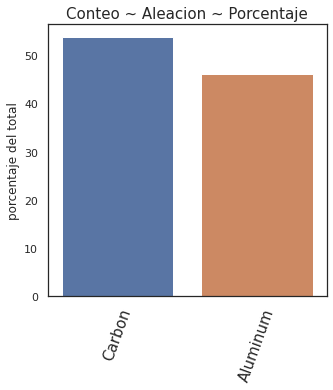

In [ ]:
bar_plots(aleacion,8,5,5)

###Tiendas

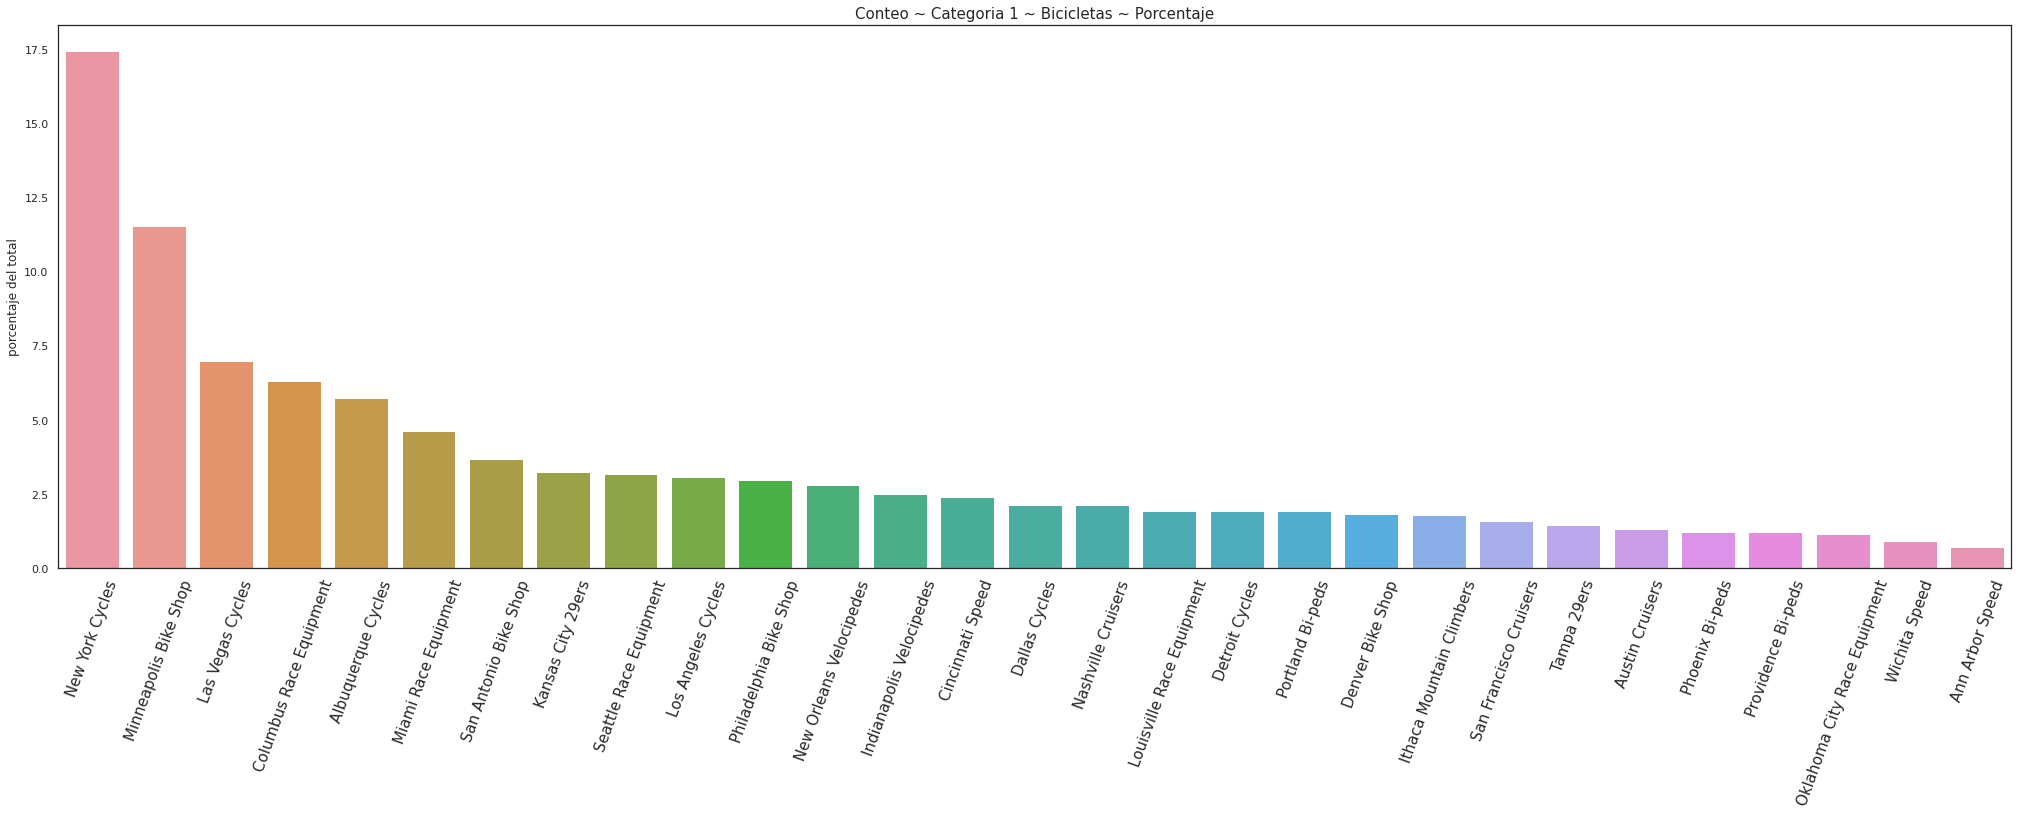

In [ ]:
bar_plots(tiendas,6,35,10)

##Boxplots y Violins

###Funcion ~ Boxplots ~ Violins

In [ ]:
def BoxplotsViolins(x,i,j,s,t): #x DataFrame. i,j ~ Sep,Yess. s,t ~ Figsize  
  fig, axes = plt.subplots(2,1, figsize=(s,t),sharex=True, sharey=True);
  sep = ['categoria_1','categoria_2','aleacion','nombre_tienda','ciudad','estado','bicicleta_adquirida',] #0 - 6
  yss = ['total','edad','sueldo'] # 0 - 2
  #plt.figure(figsize=(40, 10))
  #Se aplicara Rango Intercuantilico Para "Eliminar" Datos Atipicos y poder Observar mejor las distribuciones de nuestras variables. 
  if(j==0):
    iqr = x.total.quantile(0.75) - x.total.quantile(0.25)
    filtro_inferior = x.total > x.total.quantile(0.25) - (iqr * 1.5)
    filtro_superior = x.total < x.total.quantile(0.75) + (iqr * 1.5)
    df_filtrado = x.total[filtro_inferior & filtro_superior]
  elif(j==1):
    iqr = x.edad.quantile(0.75) - x.edad.quantile(0.25)
    filtro_inferior = x.edad > x.edad.quantile(0.25) - (iqr * 1.5)
    filtro_superior = x.edad < x.edad.quantile(0.75) + (iqr * 1.5)
    df_filtrado = x.edad[filtro_inferior & filtro_superior]
  elif(j==2):
    iqr = x.sueldo.quantile(0.75) - x.sueldo.quantile(0.25)
    filtro_inferior = x.sueldo > x.sueldo.quantile(0.25) - (iqr * 1.5)
    filtro_superior = x.sueldo < x.sueldo.quantile(0.75) + (iqr * 1.5)
    df_filtrado = x.sueldo[filtro_inferior & filtro_superior]

  sns.boxplot(data=x, x=sep[i], y=df_filtrado,ax=axes[0]);
  sns.violinplot(data=x, x=sep[i], y=df_filtrado,ax=axes[1]);
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=50,fontsize=13);
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45,fontsize=13);


## Total ~ Categoria 1

La categoria uno se conforma por Road y Montain, un parte aguas importante en las bicicletas.

>Como podremos observar en nuestro boxplot, se tienen demasiados valores atipicos en Road, por lo que es claro que se tienen menores ganacias cuando se escoje la categoria road. Ademas, como se observa, el rango intercuantilico tambien es menor, asi como la mediana de las ganancias en comparancion con la categoria Mountain. 

>Finalmente se tienen distribuciones multimodales en ambas categorias, pero estas son mas presentes en la categoria Mountain comparada con Road.

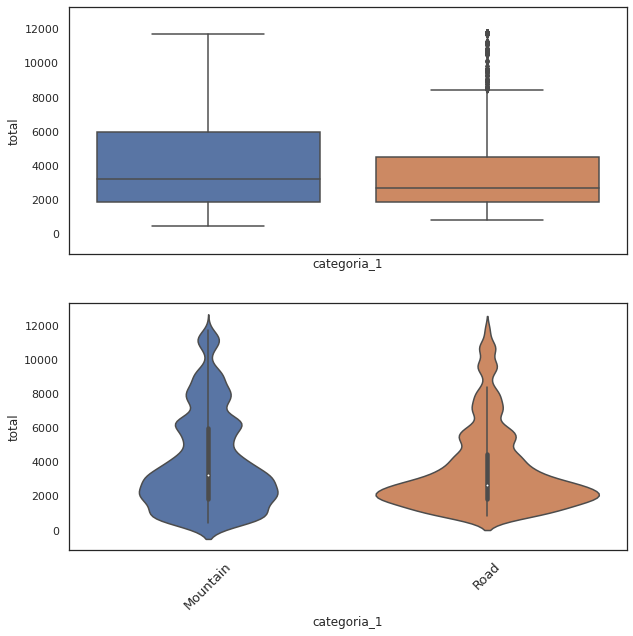

In [ ]:
BoxplotsViolins(str_or_bks,0,0,10,10)

Categoria 2 es donde se tienen las divisiones mas claras en cuanto a bicicletas. Formando un total de 9 diferentes tipos.

>Como podemos observar en los boxplots, las bicicletas con mayores ganancias y consistentes estan formadas principalmente por "Over Mountain", "Cross Country Race" y "Triathalon", dado que estas no presentan valores atipicos como se muestra. 

>Luego se tiene, que aquellas con menores ventas estan conformadas por "Sport" principalmente, seguido de "CycloCross" y "Fat Bike". Puesto que son las que tienen rangos intercuantilicos mas peque√±os, asi como cuartiles superiores menores a differencia del resto de categorias, y finalmente los menores outliers.

>Por el lado de los violin plots podemos observar que se tienen distribuciones multimodales en la gran parte de nuestras categorias. Donde las que destacan mas, son "Over Mountain" y "Cross Country Race" teniendo multiples picos.

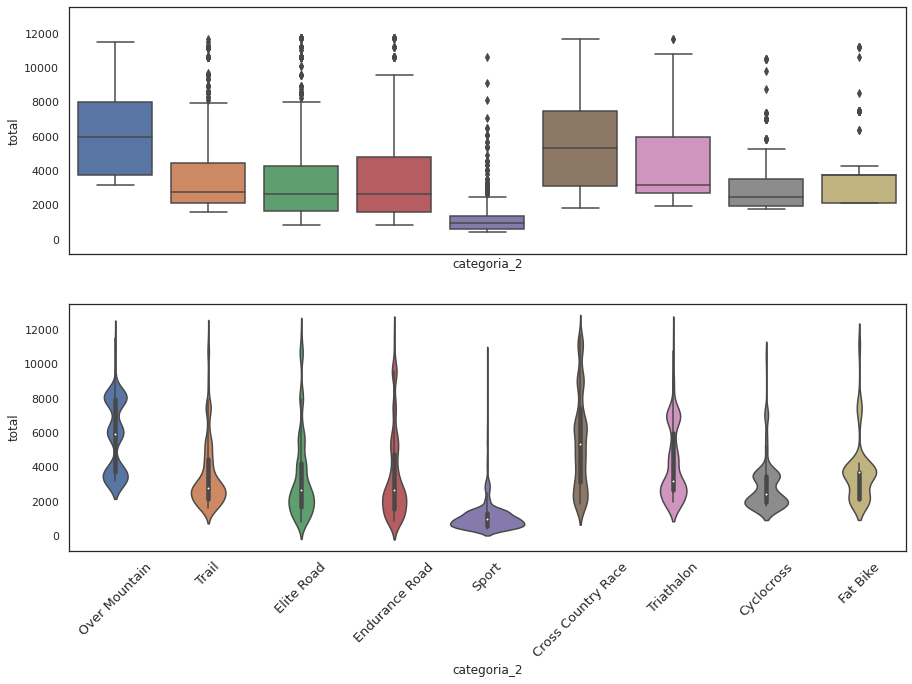

In [ ]:
BoxplotsViolins(str_or_bks,1,0,15,10)

##Total ~ Ciudad

>A continuancion podemos observar que las ciudades con ganancias mas consistentes son conformadas por detroit, louisville, indianapolis, los angeles y Nashville. Puesto que son las ciudades que tienen menores valores atipicos a comparancion del resto de las ciudades.

>Por otra parte, como era de esperarse, aquellas ciudades que presentan distribuciones normales peque√±as (achicopaladas) en los violin plots son aquellas que han tenido menores ganancias, y que ademas presentan demasiados valores atipicos, como lo es la ciudad de San Francisco, Phoenix, Providence, Las Vegas entre muchas otras. 

> Mientras que aquellas distribuciones mas raras e incluso donde se acercan a ser bimodales (Como lo es el caso de Columbus) son las que tienen mejores ganancias y menores valores atipicos como se muestran en sus respectivos boxplots.

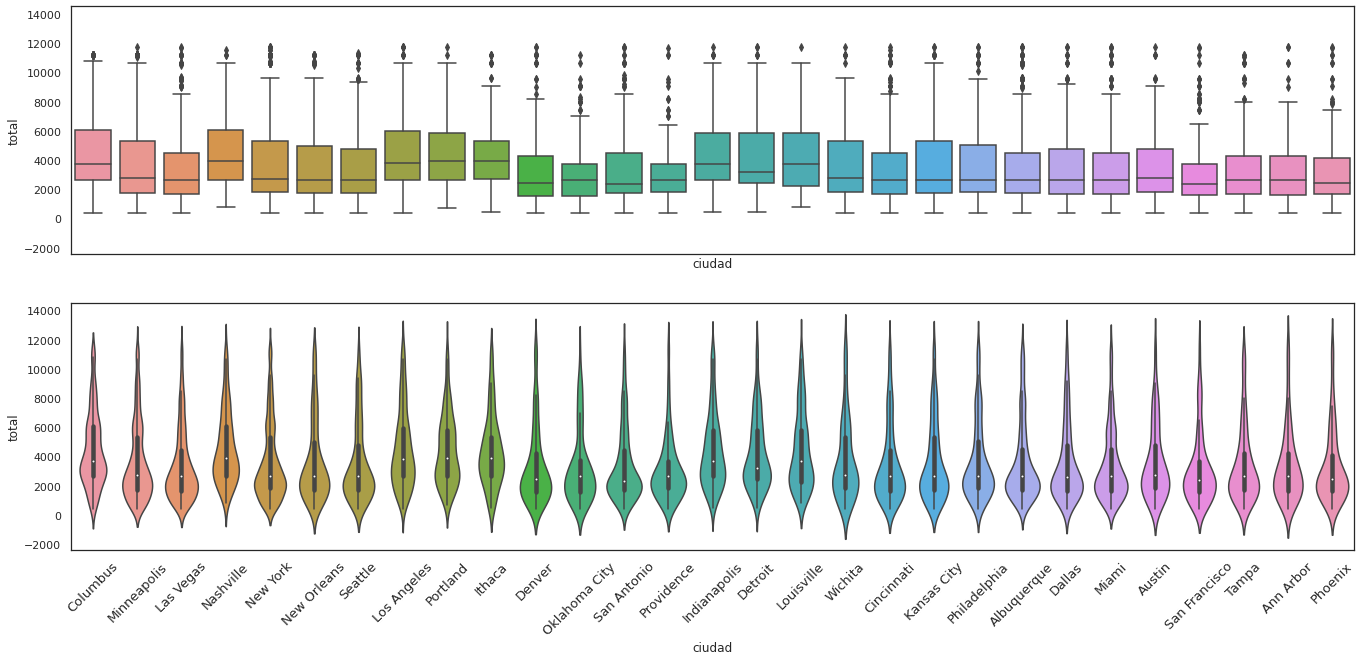

In [ ]:
BoxplotsViolins(str_or_bks,4,0,23,10)

El Analisis para las tiendas es bastante similar al de las ciudades, por lo que se omite, pero se deja para tener mas informacion sobre lo que ocurre con cada tienda.

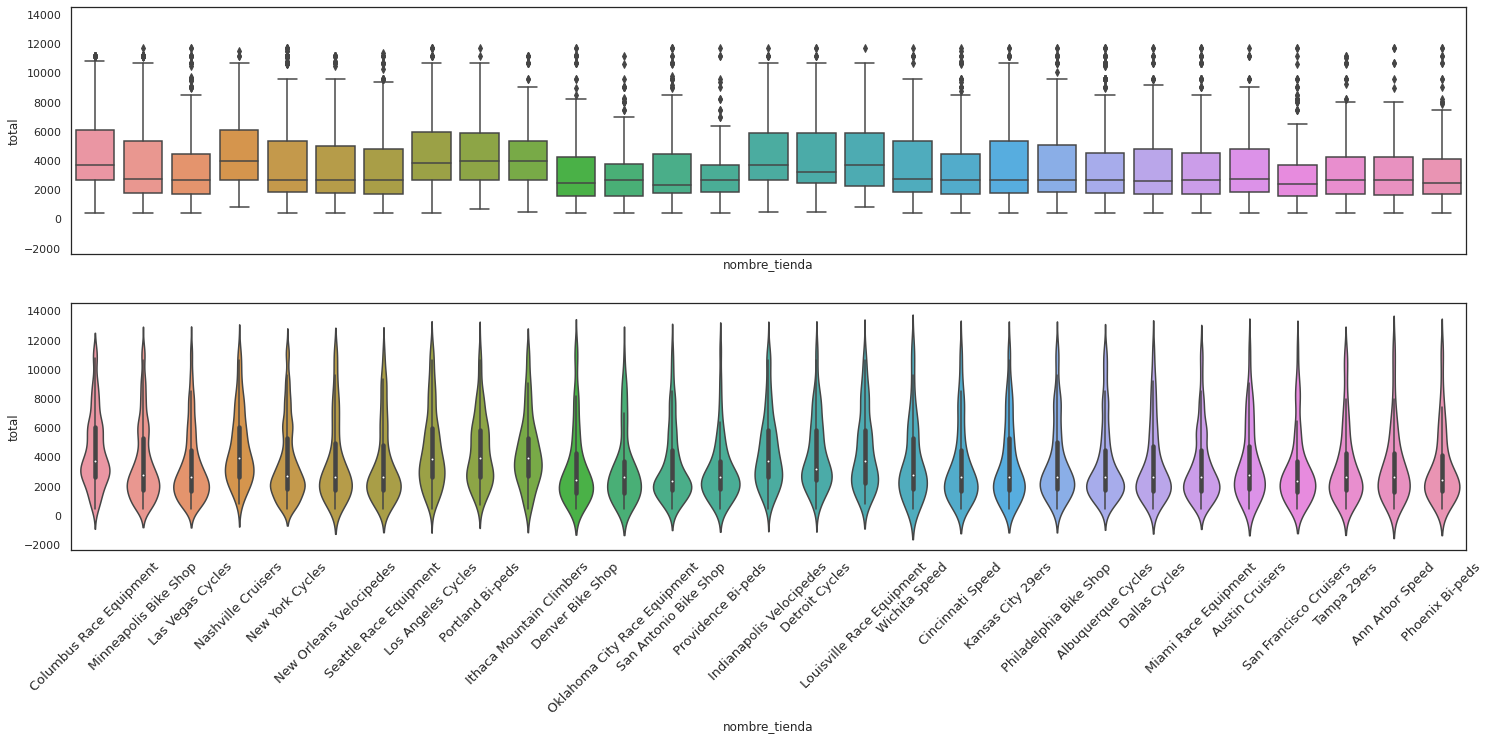

In [ ]:
BoxplotsViolins(str_or_bks,3,0,25,10)

##Edad ~ Compradores de Bicicleta

>Como podemos observar a continuancion, se tiene que entre mas jovenes son los consumidores, mayor es la probabilidad de que estos compren. Como se observa en el boxplot, se tienen valores atipicos cuando estos son mayores, por lo que podemos asegurar nuestro argumento.

>Como se observa en el los violins, se presenta una distribucion bimodal en la edad de aquellas personas que no han comprado una bicicleta. Con picos aproximados en las edades de 30 y 45 a√±os. 

>Mientras que en la distribucion de aquellos que si compraron bicicletas se presenta un pico en la edad de 35 a√±os aproximadamente. Y disminuciones en las edades de 30 y 45 (aprox.) como era de esperarse y viceversa. Finalmente se tiene un rango intercuantilico menor en aquellos que si compraron en comparacion a lo que no. 

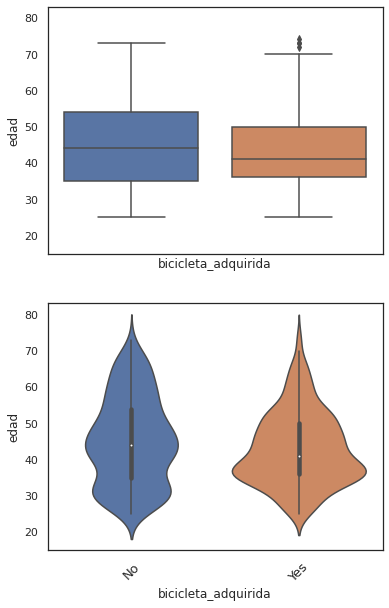

In [ ]:
BoxplotsViolins(compradores,6,1,6,10)

##Salario ~ Compradores de Bicicleta

>En esta ocasion se observa que aquellos con mayor salario tienden a comprar mas bicis que aquellos que no, como se observa en nuestro boxplot, la mediana es mucho mayor, asi como el rango intercuantilico.

>Por otra parte, en los violin plots podemos observar distribuciones bimodales, pero no se encuentra un patron a diferencia del que encontramos en el violinplot de edades.

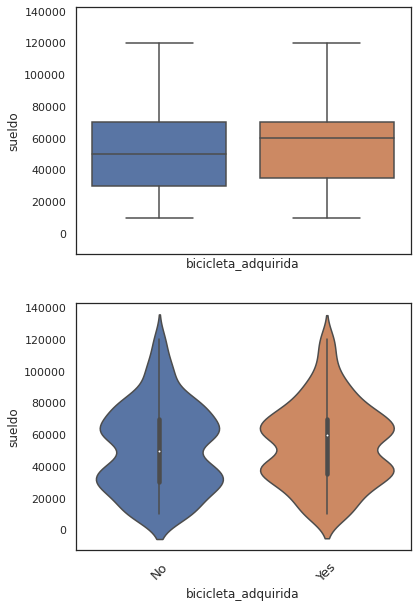

In [ ]:
BoxplotsViolins(compradores,6,2,6,10)

#PostWork 4
>Realizar an√°lisis bivariado con variables num√©ricas

>Explorar las relaciones existentes entre nuestras variables num√©ricas,mediante matriz de correlaciones y pairplot

>Analizar valores at√≠picos y decidir qu√© hacer con ellos

>Entrenar modelos de regresi√≥n lineal para realizar predicciones



##Matriz de correlaciones

Obtenemos una matriz de correlaciones de Pearson con la funci√≥n dataframe.corr() de pandas. 
Autom√°ticamente se va a aplicar a las columnas con datos num√©ricos. 


In [ ]:
compradores.corr()

id_comprador    sueldo     hijos     autos      edad
id_comprador      1.000000 -0.079949 -0.040780  0.028124 -0.053120
sueldo           -0.079949  1.000000  0.251622  0.434180  0.172121
hijos            -0.040780  0.251622  1.000000  0.250081  0.532780
autos             0.028124  0.434180  0.250081  1.000000  0.183033
edad             -0.053120  0.172121  0.532780  0.183033  1.000000

Ahora representamos la matriz como mapa de calor

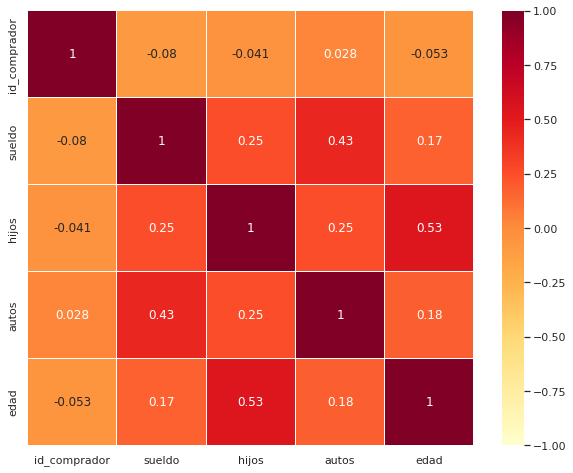

In [ ]:
plt.figure(figsize=(10, 8))
ax = sns.heatmap(compradores.corr(), vmin=-1, vmax=1, annot=True, cmap="YlOrRd", linewidths=.2);

La mayor√≠a de las correlaciones son muy d√©biles, lo cual no es extra√±o ya que la mayor√≠a de los datos del dataframe son categ√≥ricos y los num√©ricos no necesariamente tienen que estar correlacionados. A√∫n as√≠, las mejores correlaciones se encuentran entre "edad" e "hijos, y entre "autos" y "sueldo".

##Pairplots

Con los pairplots podemos tener m√°s criterio para definir si nuestras variables est√°n correlacionadas. 



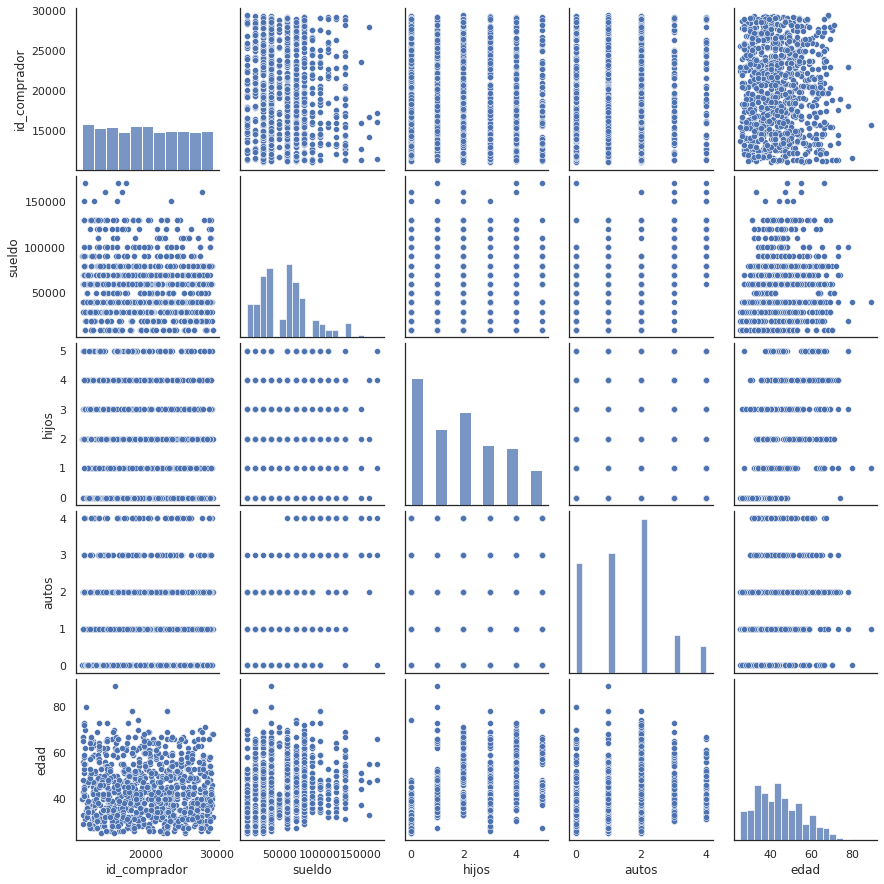

In [ ]:
sns.pairplot(compradores);

Como se observa, nuestros mejores candidatos en el heatmap realmente incluyen una variable categ√≥rica. Entre "edad" y "id_comprador" se da mayor distribuci√≥n sin forma categ√≥rica, pero adem√°s de que no hace mucho sentido para el objetivo del proyecto, la correlaci√≥n es muy d√©bil. 

##Datos at√≠picos

Como hemos visto a lo largo de nuestro analisis (Postwork 2), se ha tomado la decisi√≥n de filtar nuestros datos a partir del rango intercuantilico, dado que se tienen demasiados valores atipicos que causan bastante ruido, los cuales afectan principalmente la dispersi√≥n y el coeficiente de correlaci√≥n de Pearson. 

##Modelo de Regresi√≥n L√≠neal

Queda claro que nuestros datos son en mayor√≠a categ√≥ricos, por lo que en s√≠ no es posible realizar un modelo de regresi√≥n l√≠neal (al final terminaremos creando un modelo de regresi√≥n log√≠stica). Sin embargo con fines de pr√°ctica, forzaremos el modelo entre las variables que resultaron m√°s aptas, "id_comprador" y "edad", ya que aunque la correlaci√≥n es muy d√©bil, es negativa. 

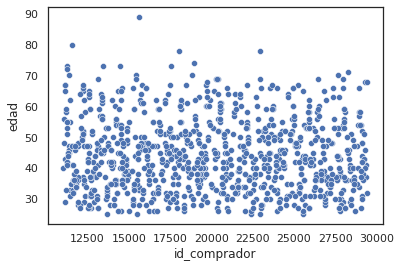

In [ ]:
sns.scatterplot(x=compradores['id_comprador'],y=compradores['edad']);

In [ ]:
#importamos el modelo de la librer√≠a stick-learn
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()

# Usamos 'to_frame' para crear una estructura de 2 dimensiones, como lo requiere el modelo
lr.fit(compradores['id_comprador'].to_frame(), compradores['edad'])

LinearRegression()

In [ ]:
#intentamos predecir y 
y_predict = lr.predict(compradores['id_comprador'].to_frame())

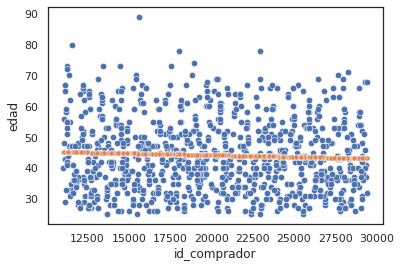

In [ ]:
#creamos nuestra gr√°fica de y original vs y predecida(en naranja)
sns.scatterplot(x=compradores['id_comprador'], y=compradores['edad'], s=40);
sns.scatterplot(x=compradores['id_comprador'], y=y_predict, s=25);

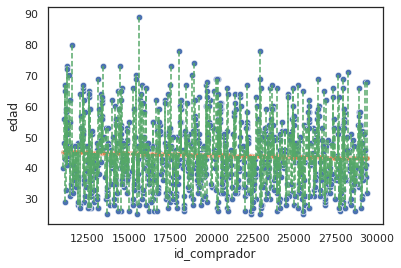

In [ ]:
#vemos el margen de error de cada punto

sns.scatterplot(x=compradores['id_comprador'], y=compradores['edad'], s=40);
sns.scatterplot(x=compradores['id_comprador'], y=y_predict, s=25);

for i in range(len(compradores['id_comprador'])):
    plt.plot([compradores['id_comprador'][i], compradores['id_comprador'][i]], [compradores['edad'][i], y_predict[i]], 'g--')

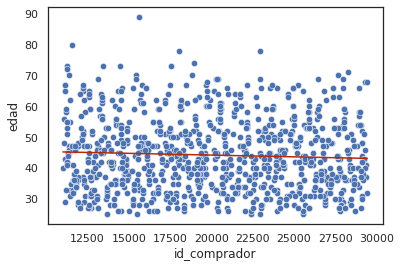

In [ ]:
#Gr√°ficamos la l√≠nea de tendencia rojo

sns.scatterplot(x=compradores['id_comprador'], y=compradores['edad'], s=40);
sns.lineplot(x=compradores['id_comprador'], y=y_predict, color='#B92706');

In [ ]:
#Extraemos la ecuaci√≥n de la recta del modelo ya entrenado
intercept = lr.intercept_
coefficient = lr.coef_[0]

In [ ]:
#Imprimimos la ecuaci√≥n de la recta
print(f'y = {coefficient} * x + {intercept}')



y = -0.00011339669340707472 * x + 46.478434326465944


In [ ]:
#Comprobamos
print(f'Valor de x: {compradores["id_comprador"][10]}')
print(f'Valor predecido por nuestro modelo: {y_predict[10]}')
print(f'Valor cuantificado directamente usando la funcion: {coefficient * compradores["id_comprador"][10] + intercept}')

Valor de x: 11434
Valor predecido por nuestro modelo: 45.18185653404945
Valor cuantificado directamente usando la funcion: 45.18185653404945


Se ha intentado hacer un modelo de regresi√≥n lineal, y ha funcionado pero no tiene mucho sentido, ya que nuestros datasets se componen en su gran parte de variables categoricas. Posteriormente se har√° un modelo de regresion logistica (Postwork 8).

#Postwork 5

>Vamos a aplicar la t√©cnica de bootstrap para analizar el sesgo en las distribucuiones ya analizadas . De cada grupo de datos se obtendr√° por boostrap:

a) La distribuci√≥n, su asimetr√≠a y curtosis

b) El error est√°ndar

c) El intervalo de confianza que te parezca m√°s apropiado

>Si es pertinente con los datos, entrenar un modelo de regresi√≥n l√≠neal. 

##Funci√≥n de Bootstrap

Con la siguiente funci√≥n se hacen todos los pasos del bootstrap, tomando subconjutnos aleatorios con reposici√≥n (para no alterar la probabilidad al seleccionar) y obteniendo la media. La distribuci√≥n de las medias de los subconjuntos debe ser normal de acuerdo al Teorema del L√≠mite Central, de lo contrario comenzamos a tener incertidumbre en los datos. 

In [ ]:
def all_in_one_bootstrap(x):
  
  means = []

  for i in range(100_000):
      if len(x)<30: #Realiza la toma aleatoria de acuerdo al tama√±o del grupo
        sample = x.sample(n=20, replace=True) 
        means.append(sample.mean())
      else: 
        sample = x.sample(n=50, replace=True) 
        means.append(sample.mean())
    
  serie_means = pd.Series(means)

  limite_inferior = serie_means.quantile(0.025)
  limite_superior = serie_means.quantile(0.975)

  mean_of_intervals = ((x.mean() - limite_inferior) + (limite_superior - x.mean())) / 2

  print(f'{Fore.CYAN}Media {Style.RESET_ALL}~ {x.mean()}') #  ~ Media
  print(f'{Fore.CYAN}Asimetria {Style.RESET_ALL}~ {serie_means.skew()}') # ~ Asimetria
  print(f'{Fore.CYAN}Curtosis {Style.RESET_ALL}~ {serie_means.kurtosis()}') #~ Curtosis  
  print(f'{Fore.CYAN}Error Estandar {Style.RESET_ALL}~ {serie_means.std()}')   #  ~ Error Estandar
  print(f'{Fore.CYAN}Valor minimo {Style.RESET_ALL}~ {serie_means.min()}') # ~ Valor minimo
  print(f'{Fore.CYAN}Valor maximo {Style.RESET_ALL}~ {serie_means.max()}') # ~ Valor maximo
  print(f'{Fore.CYAN}Rango {Style.RESET_ALL}~ {serie_means.max() - serie_means.min()}') # ~ Rango
  print(f'{Fore.CYAN}Intervalo de 95% confianza de la media {Style.RESET_ALL}~{limite_inferior} < {x.mean()} < {limite_superior}') #limites al 95%
  print(f'{Fore.CYAN}Intervalo de 95% confianza de la media {Style.RESET_ALL}~ {x.mean()} +/- {mean_of_intervals}') #media +- rango de intervalos

  #Graficamos
  sns.displot(serie_means, kde=False)
  plt.axvline(limite_inferior)
  plt.axvline(limite_superior);


Como son bastantes datos a analizar s√≥lo se da un comentario breve en cada caso y se da un comentario general al final. 

##Items vendidos por tienda
Normalidad aceptable. 

Media ~ 688.4827586206897
Asimetria ~ 0.5811657075308507
Curtosis ~ 0.2923087207894275
Error Estandar ~ 154.33431649891506
Valor minimo ~ 309.2
Valor maximo ~ 1575.15
Rango ~ 1265.95
Intervalo de 95% confianza de la media ~437.0 < 688.4827586206897 < 1031.65125
Intervalo de 95% confianza de la media ~ 688.4827586206897 +/- 297.32562499999995


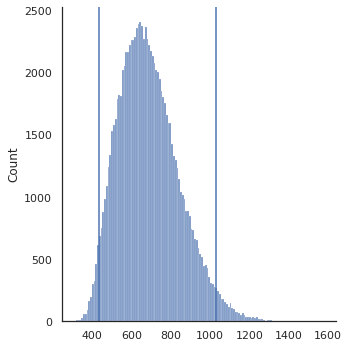

In [ ]:
all_in_one_bootstrap(items_sold_per_tienda)

##Items vendidos por Bici
Normalidad excelente

Media ~ 207.5625
Asimetria ~ 0.005872235775556417
Curtosis ~ -0.030048311900668256
Error Estandar ~ 6.645017854352076
Valor minimo ~ 177.88
Valor maximo ~ 235.0
Rango ~ 57.120000000000005
Intervalo de 95% confianza de la media ~194.5 < 207.5625 < 220.58
Intervalo de 95% confianza de la media ~ 207.5625 +/- 13.040000000000006


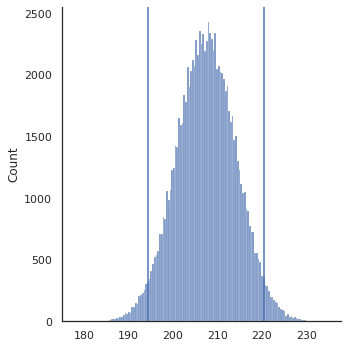

In [ ]:
all_in_one_bootstrap(items_sold_per_bici)

##Ganancias por Bici
Muy buena normalidad

Media ~ 763513.2291666666
Asimetria ~ 0.3350428088629085
Curtosis ~ 0.14451134517111397
Error Estandar ~ 84068.52460062828
Valor minimo ~ 469212.8
Valor maximo ~ 1235938.4
Rango ~ 766725.5999999999
Intervalo de 95% confianza de la media ~612331.495 < 763513.2291666666 < 941104.0024999998
Intervalo de 95% confianza de la media ~ 763513.2291666666 +/- 164386.25374999992


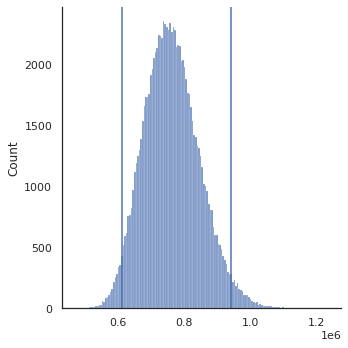

In [ ]:
all_in_one_bootstrap(gains_per_bici)

##Ganancias por tienda
Normalidad aceptable

Media ~ 2495311.896551724
Asimetria ~ 0.5788796055072016
Curtosis ~ 0.3385575030559349
Error Estandar ~ 552898.0674084577
Valor minimo ~ 1051270.5
Valor maximo ~ 5495157.25
Rango ~ 4443886.75
Intervalo de 95% confianza de la media ~1589493.4000000001 < 2495311.896551724 < 3720463.0249999994
Intervalo de 95% confianza de la media ~ 2495311.896551724 +/- 1065484.8124999995


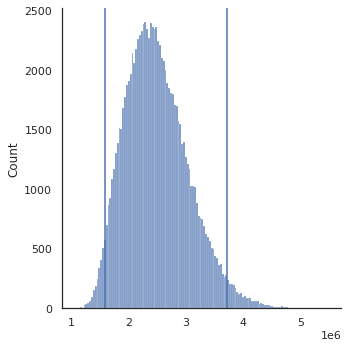

In [ ]:
all_in_one_bootstrap(gains_per_tienda)

##Ganancias por Orden
Normalidad muy buena

Media ~ 36703.690535803704
Asimetria ~ 0.19744898115671713
Curtosis ~ 0.016887279293260615
Error Estandar ~ 5719.094917802662
Valor minimo ~ 16535.7
Valor maximo ~ 69687.8
Rango ~ 53152.100000000006
Intervalo de 95% confianza de la media ~26146.295 < 36703.690535803704 < 48378.2025
Intervalo de 95% confianza de la media ~ 36703.690535803704 +/- 11115.95375


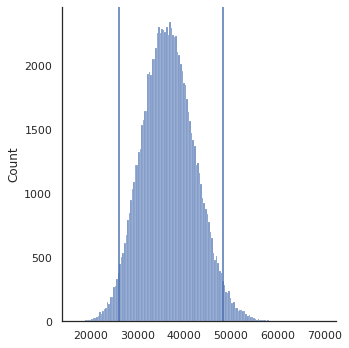

In [ ]:
all_in_one_bootstrap(gain_per_order)

##Ganancias por Ciudad
Normalidad aceptable

Media ~ 2495311.896551724
Asimetria ~ 0.571902294956054
Curtosis ~ 0.297429153274817
Error Estandar ~ 555772.228125371
Valor minimo ~ 1042334.25
Valor maximo ~ 5559565.0
Rango ~ 4517230.75
Intervalo de 95% confianza de la media ~1588901.43125 < 2495311.896551724 < 3721280.7124999994
Intervalo de 95% confianza de la media ~ 2495311.896551724 +/- 1066189.6406249998


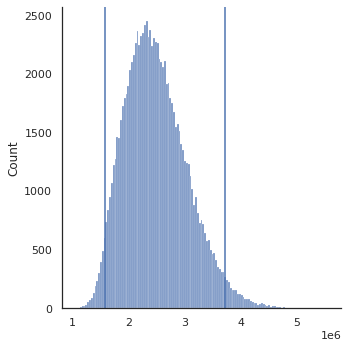

In [ ]:
all_in_one_bootstrap(gain_per_city)

##Ganancias por Mes de Todas las tiendas
Normalidad excelente

Media ~ 1221621.1666666667
Asimetria ~ 0.08499340810100231
Curtosis ~ -0.0065939092709572655
Error Estandar ~ 71762.83591020967
Valor minimo ~ 928507.8
Valor maximo ~ 1538171.1
Rango ~ 609663.3
Intervalo de 95% confianza de la media ~1084197.0975 < 1221621.1666666667 < 1365272.1975
Intervalo de 95% confianza de la media ~ 1221621.1666666667 +/- 140537.55000000005


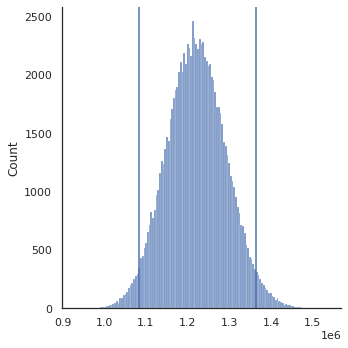

In [ ]:
all_in_one_bootstrap(gain_per_month_from_all)

##Ganancias por Mes de Cada Tienda
Normalidad  Buena

Media ~ 73665.59798994975
Asimetria ~ 0.3084683136952557
Curtosis ~ 0.13363413298637505
Error Estandar ~ 11667.551484289515
Valor minimo ~ 34349.7
Valor maximo ~ 130929.1
Rango ~ 96579.40000000001
Intervalo de 95% confianza de la media ~52517.195 < 73665.59798994975 < 98142.43499999998
Intervalo de 95% confianza de la media ~ 73665.59798994975 +/- 22812.61999999999


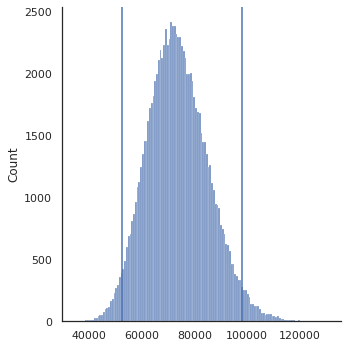

In [ ]:
all_in_one_bootstrap(gain_per_month_per_tienda)

##Subtotal
Ligeramente cargado hacia la izquierda

Media ~ 4743.545819311416
Asimetria ~ 0.7342381664441505
Curtosis ~ 0.9542031884316748
Error Estandar ~ 766.7100566400994
Valor minimo ~ 2516.3
Valor maximo ~ 9864.4
Rango ~ 7348.099999999999
Intervalo de 95% confianza de la media ~3498.8 < 4743.545819311416 < 6503.209999999997
Intervalo de 95% confianza de la media ~ 4743.545819311416 +/- 1502.2049999999986


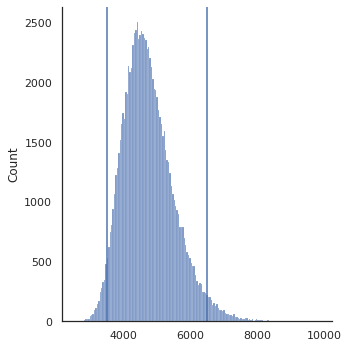

In [ ]:
all_in_one_bootstrap(or_bikes['total'])

##Edad de Clientes (No implica que hayan comprado bicicletas)
Normalidad excelente

In [ ]:
all_in_one_bootstrap(compradores['edad'])

##Edad de Compradores de Bicicletas
Normalidad excelente

In [ ]:
all_in_one_bootstrap(real_buyers['edad'])

##Salario de Clientes (No implica que hayan comprado una bicicleta
Normalidad excelente

In [ ]:
all_in_one_bootstrap(compradores['sueldo'])

##Salario de Compradores de Bicicletas
Normalidad muy buena

In [ ]:
all_in_one_bootstrap(real_buyers['sueldo'])

##Conclusi√≥n Bootstrap
La gran mayor√≠a de nuestros grupos de datos cuenta con una normalidad excelente o muy buena , lo cual cumple el teorema del l√≠mite central y nos dice que los datos est√°n sesgadoz y tienen baja incertidumbre. Algunos con calores de asimetr√≠a y curtosis entre 0.3 y 0.5 muestran una ligera carga a la izquierda, pero a√∫n pueden pasar como normales en un criterio no muy estricto, s√≥lo en "Subtotal" los datos parecen tener un sezgo ligero con los datos distribu√≠dos hacia la izquierda.
En todos los casos se tom√≥ un intervalo de confianza del 95% ya que lo consideramos el m√≠nimo para que los resultados sean aceptables.

##Entrenamiento de modelo de Regresi√≥n Lineal M√∫ltiple
Como se ha evidenciado en nuestros data frames, nuestros datos son categ√≥ricos y los num√©ricos tienen una correlaci√≥n demasiado baja, por lo que no es pertinente realizar un modelo de Regresi√≥n L√≠neal M√∫ltiple. Al final nos quedamremos con un modelo de Regresi√≥n Log√≠stica

# Postwork 6

In [ ]:
path = "https://raw.githubusercontent.com/hvasquez28/g1-ds_santander-f2-team7-Phyton/datos-faltantes-y-correciones/Entrega_Final_Procesamiento_DanielTapia_LuisZanabria_NorbertoPena_HaroldVasquez/datasets/bike_buyers.csv"
df = pd.read_csv(path)
df = df.drop(['ID'], axis = 1)
df.head()

Marital Status  Gender   Income  Children        Education      Occupation  \
0        Married  Female  40000.0       1.0        Bachelors  Skilled Manual   
1        Married    Male  30000.0       3.0  Partial College        Clerical   
2        Married    Male  80000.0       5.0  Partial College    Professional   
3         Single     NaN  70000.0       0.0        Bachelors    Professional   
4         Single    Male  30000.0       0.0        Bachelors        Clerical   

  Home Owner  Cars Commute Distance   Region   Age Purchased Bike  
0        Yes   0.0        0-1 Miles   Europe  42.0             No  
1        Yes   1.0        0-1 Miles   Europe  43.0             No  
2         No   2.0        2-5 Miles   Europe  60.0             No  
3        Yes   1.0       5-10 Miles  Pacific  41.0            Yes  
4         No   0.0        0-1 Miles   Europe  36.0            Yes

In [ ]:
education = list(pd.unique(df['Education']))
counts = df.value_counts(["Education", "Gender"])
y1 = [counts[value]['Male'] for value in education]
y2 = [counts[value]['Female'] for value in education]

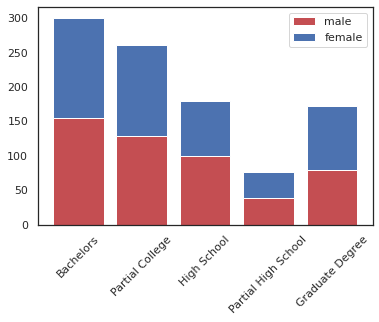

In [ ]:
plt.bar(education, y1, color='r', label = 'male')
plt.bar(education, y2, bottom=y1, label = 'female', color='b')
plt.xticks(rotation=45)
plt.legend(loc="upper right")
plt.show()

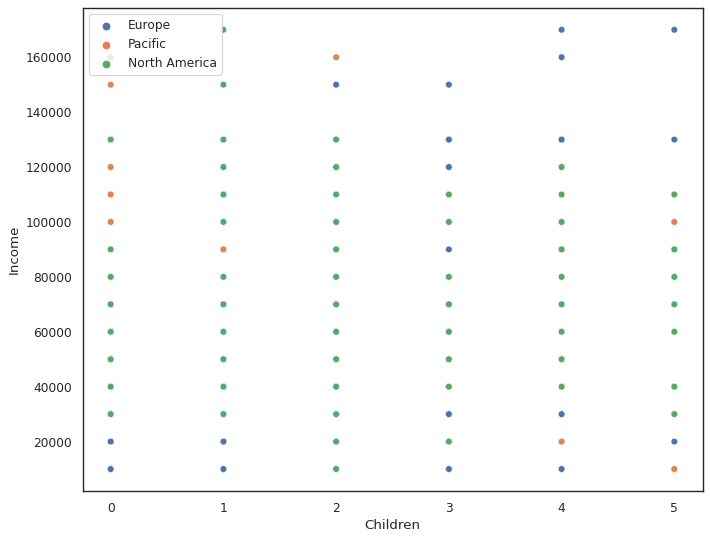

In [ ]:
plt.figure(figsize=(10, 8), dpi=80)
sns.scatterplot(x="Children", y="Income", data=df, hue="Region")
plt.legend(loc="upper left")
plt.show()

In [ ]:
path = "https://github.com/hvasquez28/g1-ds_santander-f2-team7-Phyton/blob/datos-faltantes-y-correciones/Entrega_Final_Procesamiento_DanielTapia_LuisZanabria_NorbertoPena_HaroldVasquez/datasets/bikeshops.xlsx?raw=true"
df2 = pd.read_excel(path)
df2 = df2.drop(['bikeshop.id'], axis = 1)
df2.head()

bikeshop.name bikeshop.city bikeshop.state   latitude  \
0  Pittsburgh Mountain Machines    Pittsburgh             PA  40.440625   
1      Ithaca Mountain Climbers        Ithaca             NY  42.443961   
2       Columbus Race Equipment      Columbus             OH  39.961176   
3                Detroit Cycles       Detroit             MI  42.331427   
4              Cincinnati Speed    Cincinnati             OH  39.103118   

   longitude  
0 -79.995886  
1 -76.501881  
2 -82.998794  
3 -83.045754  
4 -84.512020

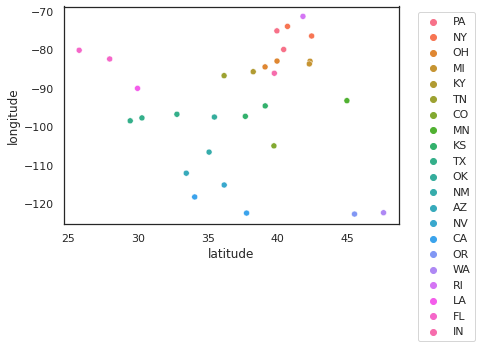

In [ ]:
sns.scatterplot(x = "latitude", y = 'longitude', data = df2, hue = 'bikeshop.state')
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.show()

# Postwork 7
Para el proposito de este proyecto, no es necesario aplicar NLP

# Postwork 8

In [ ]:
path = "https://raw.githubusercontent.com/hvasquez28/g1-ds_santander-f2-team7-Phyton/datos-faltantes-y-correciones/Entrega_Final_Procesamiento_DanielTapia_LuisZanabria_NorbertoPena_HaroldVasquez/datasets/bike_buyers.csv"
df = pd.read_csv(path)
df_copy = df.copy()

## Limpieza de los datos

Vamos a limpiar nuestro dataset para seleccionar nuestras variables independientes X y nuestra variable dependiente y, adem√°s de procesar los datos para transformar valores categ√≥ricos a su representaci√≥n n√∫merica

Revisaremos primero si podemos sustituir valores nulos de algunas columnas para no remover filas de nuestro dataset

In [ ]:
df_copy.isna().sum()

ID                   0
Marital Status       7
Gender              11
Income               6
Children             8
Education            0
Occupation           0
Home Owner           4
Cars                 9
Commute Distance     0
Region               0
Age                  8
Purchased Bike       0
dtype: int64

In [ ]:
df_copy.dropna(subset = ['Income','Children','Home Owner', 'Cars','Age','Marital Status'], axis = 0, inplace = True)
df_copy.isna().sum()

ID                   0
Marital Status       0
Gender              10
Income               0
Children             0
Education            0
Occupation           0
Home Owner           0
Cars                 0
Commute Distance     0
Region               0
Age                  0
Purchased Bike       0
dtype: int64

In [ ]:
pd.unique(df_copy['Gender'])

array(['Female', 'Male', nan], dtype=object)

In [ ]:
df_copy.isna().sum()

ID                   0
Marital Status       0
Gender              10
Income               0
Children             0
Education            0
Occupation           0
Home Owner           0
Cars                 0
Commute Distance     0
Region               0
Age                  0
Purchased Bike       0
dtype: int64

In [ ]:
df_copy['Gender'].replace(np.nan, 'Other', inplace=True)

In [ ]:
df_copy.reset_index(drop = True, inplace = True)

## Transformaci√≥n de los datos

Vamos a obtener la representaci√≥n n√∫merica de las variables categ√≥ricas del conjunto de datos

In [ ]:
df_copy['Purchased Bike'] = df_copy['Purchased Bike'].map({'Yes':1, 'No':0})
#df_copy['Marital Status'] = df_copy['Marital Status'].map({'Married':1, 'Single':0})
#df_copy['Home Owner'] = df_copy['Home Owner'].map({'Yes':1, 'No':0})

df_copy = df_copy.drop(['ID'], axis = 1)

In [ ]:
df_copy.head()

## Obtenci√≥n de de dummies para variables categ√≥ricas

In [ ]:
X_list = ['Marital Status', 'Gender','Income', 'Region','Home Owner', 'Cars','Age'] #Lista para seleccionar los atributos para el modelo
X_list_excluded = df_copy.columns.difference(X_list) #Lista con los atributos que NO se usaran
categorical_list = ['Marital Status', 'Gender','Home Owner', 'Region'] #Lista con los atributos de los que obtendremos los dummies

In [ ]:
df_list = []
for categorical in categorical_list:
    df_list.append(pd.get_dummies(df_copy[categorical], drop_first=True))

In [ ]:
for dataframe in df_list:
    df_copy = pd.concat([df_copy, dataframe], axis = 1)
    
df_copy.head()

Marital Status  Gender   Income  Children        Education      Occupation  \
0        Married  Female  40000.0       1.0        Bachelors  Skilled Manual   
1        Married    Male  30000.0       3.0  Partial College        Clerical   
2        Married    Male  80000.0       5.0  Partial College    Professional   
3         Single   Other  70000.0       0.0        Bachelors    Professional   
4         Single    Male  30000.0       0.0        Bachelors        Clerical   

  Home Owner  Cars Commute Distance   Region   Age  Purchased Bike  Single  \
0        Yes   0.0        0-1 Miles   Europe  42.0               0       0   
1        Yes   1.0        0-1 Miles   Europe  43.0               0       0   
2         No   2.0        2-5 Miles   Europe  60.0               0       0   
3        Yes   1.0       5-10 Miles  Pacific  41.0               1       1   
4         No   0.0        0-1 Miles   Europe  36.0               1       1   

   Male  Other  Yes  North America  Pacific  
0     0      0    1              0        0  
1     1      0    1              0        0  
2     1      0    0              0        0  
3     0      1    1              0        1  
4     1      0    0              0        0

In [ ]:
df_copy = df_copy.drop(categorical_list, axis = 1)

In [ ]:
df_copy.head()

Income  Children        Education      Occupation  Cars Commute Distance  \
0  40000.0       1.0        Bachelors  Skilled Manual   0.0        0-1 Miles   
1  30000.0       3.0  Partial College        Clerical   1.0        0-1 Miles   
2  80000.0       5.0  Partial College    Professional   2.0        2-5 Miles   
3  70000.0       0.0        Bachelors    Professional   1.0       5-10 Miles   
4  30000.0       0.0        Bachelors        Clerical   0.0        0-1 Miles   

    Age  Purchased Bike  Single  Male  Other  Yes  North America  Pacific  
0  42.0               0       0     0      0    1              0        0  
1  43.0               0       0     1      0    1              0        0  
2  60.0               0       0     1      0    0              0        0  
3  41.0               1       1     0      1    1              0        1  
4  36.0               1       1     1      0    0              0        0

## Selecci√≥n de atributos y modelo log√≠stico

In [ ]:
X = np.asarray(df_copy.drop(X_list_excluded, axis = 1))
y = np.asarray(df_copy['Purchased Bike'].astype('int'))

Normalizaremos el conjunto de datos

In [ ]:
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-0.52247698, -1.31080576, -0.19636846, -0.91426356, -0.9958506 ,
        -0.10249001,  0.67971029, -1.02526714, -0.48468192],
       [-0.84800991, -0.40880637, -0.10842318, -0.91426356,  1.00416668,
        -0.10249001,  0.67971029, -1.02526714, -0.48468192],
       [ 0.77965476,  0.49319301,  1.38664658, -0.91426356,  1.00416668,
        -0.10249001, -1.47121504, -1.02526714, -0.48468192],
       [ 0.45412183, -0.40880637, -0.28431374,  1.0937765 , -0.9958506 ,
         9.75704873,  0.67971029, -1.02526714,  2.06320881],
       [-0.84800991, -1.31080576, -0.72404014,  1.0937765 ,  1.00416668,
        -0.10249001, -1.47121504, -1.02526714, -0.48468192]])

## Entrenamiento/Pruebas del modelo

Dividiremos los datos en un 80% para entrenamiento y el 20% restante para probar el modelo

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (769, 9) (769,)
Test set: (193, 9) (193,)


Definimos nuestro modelo log√≠stico

In [ ]:
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

Ahora vamos a predecir usando nuestros datos de pruebas

In [ ]:
yhat = LR.predict(X_test)
yhat

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1])

**predict_proba** devuelve estimaciones para todas las clases, ordenadas por la etiqueta de las clases. Entonces, la primera columna es la probabilidad de la clase 0, P(Y=0|X), y la segunda columna es la probabilidad de la clase 1, P(Y=1|X):

In [ ]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.53080935, 0.46919065],
       [0.54788873, 0.45211127],
       [0.66608032, 0.33391968],
       [0.47095189, 0.52904811],
       [0.56461804, 0.43538196],
       [0.41582345, 0.58417655],
       [0.49183316, 0.50816684],
       [0.64951225, 0.35048775],
       [0.48528655, 0.51471345],
       [0.44224853, 0.55775147],
       [0.44598993, 0.55401007],
       [0.54596455, 0.45403545],
       [0.65460789, 0.34539211],
       [0.49223321, 0.50776679],
       [0.43245515, 0.56754485],
       [0.4130762 , 0.5869238 ],
       [0.44300664, 0.55699336],
       [0.55522083, 0.44477917],
       [0.45956319, 0.54043681],
       [0.456245  , 0.543755  ],
       [0.55121342, 0.44878658],
       [0.40708905, 0.59291095],
       [0.56585812, 0.43414188],
       [0.47822305, 0.52177695],
       [0.44615259, 0.55384741],
       [0.58211523, 0.41788477],
       [0.39849848, 0.60150152],
       [0.52119972, 0.47880028],
       [0.51616386, 0.48383614],
       [0.6225145 , 0.3774855 ],
       [0.

## Evaluaci√≥n

## Matriz de confusi√≥n

Vamos a evaluar nuestro modelo con la matriz de confusi√≥n.

In [ ]:
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[55 24]
 [44 70]]


In [ ]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.74      0.61      0.67       114
           1       0.56      0.70      0.62        79

    accuracy                           0.65       193
   macro avg       0.65      0.66      0.65       193
weighted avg       0.67      0.65      0.65       193



In [ ]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.6459360366220858

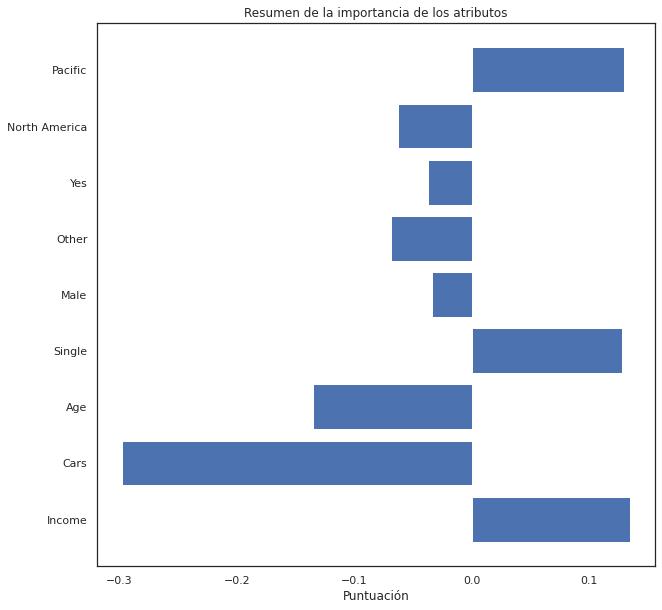

In [ ]:
importance = LR.coef_.flatten()
plt.rcParams["figure.figsize"] = (10,10)
plt.barh(df_copy.drop(X_list_excluded, axis = 1).columns, importance)
plt.title('Resumen de la importancia de los atributos')
plt.xlabel('Puntuaci√≥n')
plt.show()


In [ ]:
LR.score(X_test, y_test)

0.6476683937823834

In [ ]:
path = "https://github.com/hvasquez28/g1-ds_santander-f2-team7-Phyton/blob/datos-faltantes-y-correciones/Entrega_Final_Procesamiento_DanielTapia_LuisZanabria_NorbertoPena_HaroldVasquez/datasets/bikeshops.xlsx?raw=true"
df = pd.read_excel(path)
df = df.drop(['bikeshop.id'], axis = 1)
df.head()

bikeshop.name bikeshop.city bikeshop.state   latitude  \
0  Pittsburgh Mountain Machines    Pittsburgh             PA  40.440625   
1      Ithaca Mountain Climbers        Ithaca             NY  42.443961   
2       Columbus Race Equipment      Columbus             OH  39.961176   
3                Detroit Cycles       Detroit             MI  42.331427   
4              Cincinnati Speed    Cincinnati             OH  39.103118   

   longitude  
0 -79.995886  
1 -76.501881  
2 -82.998794  
3 -83.045754  
4 -84.512020

## Selecci√≥n de atributos

In [ ]:
X = df.iloc[:, 3:5]
X

latitude   longitude
0   40.440625  -79.995886
1   42.443961  -76.501881
2   39.961176  -82.998794
3   42.331427  -83.045754
4   39.103118  -84.512020
5   38.252665  -85.758456
6   36.162664  -86.781602
7   39.739236 -104.990251
8   44.977753  -93.265011
9   39.114053  -94.627464
10  40.712784  -74.005941
11  32.776664  -96.796988
12  35.467560  -97.516428
13  35.085334 -106.605553
14  30.267153  -97.743061
15  33.448377 -112.074037
16  36.169941 -115.139830
17  34.052234 -118.243685
18  37.774929 -122.419416
19  45.523062 -122.676482
20  47.606209 -122.332071
21  42.280826  -83.743038
22  39.952584  -75.165222
23  41.823989  -71.412834
24  29.951066  -90.071532
25  25.761680  -80.191790
26  29.424122  -98.493628
27  37.687176  -97.330053
28  39.768403  -86.158068
29  27.950575  -82.457178

## Encontrando el n√∫mero √≥ptimo de Clusters

In [ ]:
wcss = []
for i in range(1,21):
    kmeans = KMeans(i)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)


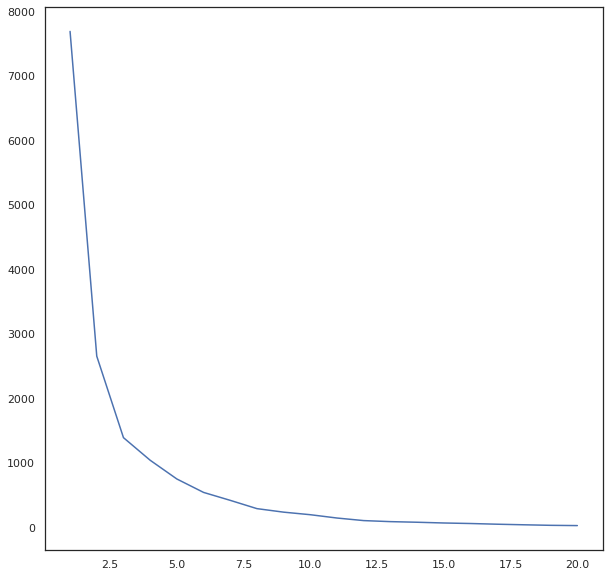

In [ ]:
number_clusters = list(range(1,21))
plt.plot(number_clusters, wcss)
plt.show()

Podemos observar que el n√∫mero √≥ptimo de clusters ser√≠a de 8 a 10

## Clustering y Resultados

In [ ]:
kmeans = KMeans(8)
kmeans.fit(X)

KMeans()

In [ ]:
identified_clusters = kmeans.fit_predict(X)
identified_clusters

array([1, 5, 1, 1, 1, 1, 1, 0, 7, 7, 5, 3, 7, 0, 3, 2, 2, 2, 2, 6, 6, 1,
       5, 5, 3, 4, 3, 7, 1, 4], dtype=int32)

In [ ]:
data_clusters = df.copy()
data_clusters['Cluster'] = identified_clusters
data_clusters.head()

bikeshop.name bikeshop.city bikeshop.state   latitude  \
0  Pittsburgh Mountain Machines    Pittsburgh             PA  40.440625   
1      Ithaca Mountain Climbers        Ithaca             NY  42.443961   
2       Columbus Race Equipment      Columbus             OH  39.961176   
3                Detroit Cycles       Detroit             MI  42.331427   
4              Cincinnati Speed    Cincinnati             OH  39.103118   

   longitude  Cluster  
0 -79.995886        1  
1 -76.501881        5  
2 -82.998794        1  
3 -83.045754        1  
4 -84.512020        1

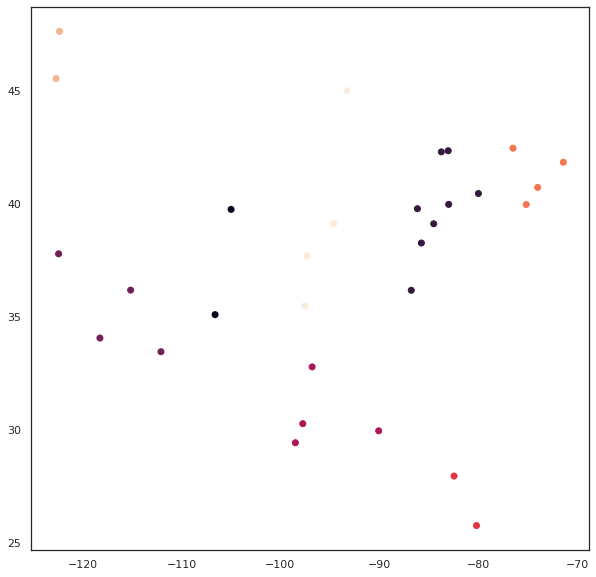

In [ ]:
plt.scatter(data_clusters['longitude'], data_clusters['latitude'], c =  data_clusters['Cluster'])
plt.show()